# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import zipfile
import os

dataset_path = '/content/drive/MyDrive/archive.zip'

extract_path = '/content/data'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('powerconsumption.csv')

In [4]:
data_path = '/content/data/powerconsumption.csv'
df = pd.read_csv(data_path)
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
import pandas as pd
import numpy as np

In [4]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


# Этап 1. Предобработка и преобразования


Применить лог-трансформацию (если y > 0).


Выполнить Бокса–Кокса:
- λ = boxcox_normmax(y_train, brack=(-2, 2))
- y_bc, _ = boxcox(y_train, lmbda=λ)


Дифференцирование: diff(1), diff(s), diff(1).diff(s).


Проверить стационарность: ADF (H₀: нестационарность), KPSS (H₀: стационарность).


Выбрать цепочку, минимизирующую противоречия между тестами.

In [5]:
from scipy import stats

In [6]:
def log_transform_column(df, column):
    """Лог-преобразование столбца"""
    df = df.copy()
    df[column + '_log'] = np.log(df[column].replace(0, 1e-10))
    return df

In [7]:
y_col = 'PowerConsumption_Zone1'

In [8]:
new_df = log_transform_column(df, y_col)

In [9]:
new_df['bkx'], _ = stats.boxcox(new_df[y_col])

In [10]:
import pandas as pd
import numpy as np

def differentiate_series(series, order=1):
    diff_series = series.copy()

    for _ in range(order):
        diff_series = diff_series.diff()

    return diff_series

In [11]:
new_df['y_diff'] = differentiate_series(new_df[y_col])

In [12]:
import sys
!{sys.executable} -m pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 13.5 MB/s eta 0:00:00


In [13]:
import sys
!{sys.executable} -m pip install tbats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 12.6 MB/s eta 0:00:00


In [14]:
import sys
!{sys.executable} -m pip install tabulate

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series, alpha=0.05):
    """
    Проверка стационарности временного ряда с помощью ADF и KPSS тестов.

    Parameters:
    -----------
    series : pandas.Series
        Временной ряд для проверки
    alpha : float
        Уровень значимости (по умолчанию 0.05)

    Returns:
    --------
    dict
        Результаты тестов
    """
    results = {}

    # ADF тест (H₀: ряд нестационарен)
    adf_result = adfuller(series.dropna())
    results['ADF'] = {
        'statistic': adf_result[0],
        'pvalue': adf_result[1],
        'stationary': adf_result[1] < alpha,
        'critical_values': adf_result[4]
    }

    # KPSS тест (H₀: ряд стационарен)
    kpss_result = kpss(series.dropna(), regression='c')
    results['KPSS'] = {
        'statistic': kpss_result[0],
        'pvalue': kpss_result[1],
        'stationary': kpss_result[1] > alpha,
        'critical_values': kpss_result[3]
    }

    results['conclusion'] = _get_stationarity_conclusion(results, alpha)

    return results

def _get_stationarity_conclusion(results, alpha):
    """Формирует вывод на основе результатов тестов"""
    adf_stationary = results['ADF']['pvalue'] < alpha
    kpss_stationary = results['KPSS']['pvalue'] > alpha

    if adf_stationary and kpss_stationary:
        return "Ряд СТАЦИОНАРЕН (оба теста подтверждают)"
    elif not adf_stationary and not kpss_stationary:
        return "Ряд НЕСТАЦИОНАРЕН (оба теста подтверждают)"
    elif adf_stationary and not kpss_stationary:
        return "Ряд СЛАБОСТАЦИОНАРЕН (разногласие: ADF - стационарен, KPSS - нестационарен)"
    else:
        return "Ряд СЛАБОСТАЦИОНАРЕН (разногласие: ADF - нестационарен, KPSS - стационарен)"

In [15]:
new_df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerConsumption_Zone1_log,bkx
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,10.435753,104.706602
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10.302756,99.856559
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,10.279459,99.029742
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,10.248100,97.927345
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,10.215949,96.809451
...,...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,10.346905,101.441817
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,10.323198,100.587544
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,10.295221,99.588416
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,10.273608,98.823147


In [19]:
check_stationarity(new_df['y_diff'])

{'ADF': {'statistic': np.float64(-40.101025359246194),
  'pvalue': 0.0,
  'stationary': True,
  'critical_values': {'1%': np.float64(-3.430474906804219),
   '5%': np.float64(-2.861595206296968),
   '10%': np.float64(-2.5667993844765054)}},
 'KPSS': {'statistic': np.float64(0.0011259076875512243),
  'pvalue': np.float64(0.1),
  'stationary': np.True_,
  'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'conclusion': 'Ряд СТАЦИОНАРЕН (оба теста подтверждают)'}

In [17]:
check_stationarity(new_df['bkx'])

{'ADF': {'statistic': np.float64(-32.14666973189456),
  'pvalue': 0.0,
  'stationary': True,
  'critical_values': {'1%': np.float64(-3.4304749044184266),
   '5%': np.float64(-2.861595205242518),
   '10%': np.float64(-2.566799383915253)}},
 'KPSS': {'statistic': np.float64(6.060278187738227),
  'pvalue': np.float64(0.01),
  'stationary': np.False_,
  'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'conclusion': 'Ряд СЛАБОСТАЦИОНАРЕН (разногласие: ADF - стационарен, KPSS - нестационарен)'}

In [16]:
check_stationarity(new_df['PowerConsumption_Zone1_log'])

/tmp/ipython-input-1639210372.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


{'ADF': {'statistic': np.float64(-32.21585608865426),
  'pvalue': 0.0,
  'stationary': True,
  'critical_values': {'1%': np.float64(-3.4304749044184266),
   '5%': np.float64(-2.861595205242518),
   '10%': np.float64(-2.566799383915253)}},
 'KPSS': {'statistic': np.float64(6.074819324216738),
  'pvalue': np.float64(0.01),
  'stationary': np.False_,
  'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'conclusion': 'Ряд СЛАБОСТАЦИОНАРЕН (разногласие: ADF - стационарен, KPSS - нестационарен)'}

### Этап 2. Разбиение данных и feature engineering


Хронологическое разбиение:
- train: 70%
- val: 15% (для настройки гиперпараметров)
- test: 15% (финальная оценка)


Признаки:
- Лаги: 1, 2, 7, 30
- Скользящие: mean/std/min/max (7, 30)
- Временные: dayofweek, month, is_holiday
- Циклические: sin(2π·t/7), cos(2π·t/12)
- Экзогенные: для SARIMAX и Prophet

In [12]:
import pandas as pd
import numpy as np

def create_lags(df, column_name, lags=[1, 2, 7, 30], drop_na=True):
    df = df.copy()

    for lag in lags:
        df[f'{column_name}_lag_{lag}'] = df[column_name].shift(lag)

    if drop_na:
        df = df.dropna()

    return df

In [13]:
lag_df = create_lags(new_df, y_col)

In [14]:
import pandas as pd
import numpy as np

def create_rolling_features(df, column_name, windows=[7, 30], stats=['mean', 'std', 'min', 'max']):
    df = df.copy()

    for window in windows:
        for stat in stats:
            col_name = f'{column_name}_rolling_{stat}_{window}'

            if stat == 'mean':
                df[col_name] = df[column_name].rolling(window=window, min_periods=1).mean()
            elif stat == 'std':
                df[col_name] = df[column_name].rolling(window=window, min_periods=1).std()
            elif stat == 'min':
                df[col_name] = df[column_name].rolling(window=window, min_periods=1).min()
            elif stat == 'max':
                df[col_name] = df[column_name].rolling(window=window, min_periods=1).max()
            elif stat == 'median':
                df[col_name] = df[column_name].rolling(window=window, min_periods=1).median()
            elif stat == 'sum':
                df[col_name] = df[column_name].rolling(window=window, min_periods=1).sum()

    return df

In [15]:
new_df = create_rolling_features(lag_df, y_col)

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def create_time_features(df, date_column, features=['dayofweek', 'month', 'is_holiday']):
    df = df.copy()

    # Преобразуем в datetime если нужно
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    for feature in features:
        if feature == 'dayofweek':
            df['dayofweek'] = df[date_column].dt.dayofweek
            df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

        elif feature == 'month':
            df['month'] = df[date_column].dt.month
            df['quarter'] = df[date_column].dt.quarter
            df['year'] = df[date_column].dt.year

        elif feature == 'is_holiday':
            df = add_holiday_features(df, date_column)

        elif feature == 'day':
            df['day'] = df[date_column].dt.day
            df['day_of_year'] = df[date_column].dt.dayofyear

        elif feature == 'time':
            df['hour'] = df[date_column].dt.hour
            df['minute'] = df[date_column].dt.minute

        elif feature == 'week':
            df['week'] = df[date_column].dt.isocalendar().week
            df['is_month_start'] = df[date_column].dt.is_month_start.astype(int)
            df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)

    return df

In [17]:
def add_holiday_features(df, date_column, country='russia'):
    """
    Добавляет признаки праздничных дней.
    """
    df = df.copy()

    # Преобразуем в datetime если нужно
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    # Основные российские праздники (фиксированные даты)
    holidays = {
        'new_year': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8)],
        'christmas': [(1, 7)],
        'defender_day': [(2, 23)],
        'womens_day': [(3, 8)],
        'labour_day': [(5, 1)],
        'victory_day': [(5, 9)],
        'russia_day': [(6, 12)],
        'unity_day': [(11, 4)]
    }

    # Создаем признак праздничного дня
    df['is_holiday'] = 0
    df['is_holiday_week'] = 0

    for date in df[date_column]:
        month_day = (date.month, date.day)

        # Проверяем фиксированные праздники
        for holiday, dates in holidays.items():
            if month_day in dates:
                df.loc[df[date_column] == date, 'is_holiday'] = 1

        # Добавляем дни вокруг праздников (праздничная неделя)
        for days_before in range(1, 3):
            prev_date = date - timedelta(days=days_before)
            prev_month_day = (prev_date.month, prev_date.day)
            for holiday, dates in holidays.items():
                if prev_month_day in dates:
                    df.loc[df[date_column] == date, 'is_holiday_week'] = 1

    return df

In [18]:
new_df = create_time_features(new_df, 'Datetime')

In [19]:
import pandas as pd
import numpy as np

def create_cyclic_features(df, date_column, periods=['dayofweek', 'month', 'dayofyear']):
    df = df.copy()

    # Преобразуем в datetime если нужно
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    for period in periods:
        if period == 'dayofweek':
            # День недели (период 7)
            df['dayofweek_sin'] = np.sin(2 * np.pi * df[date_column].dt.dayofweek / 7)
            df['dayofweek_cos'] = np.cos(2 * np.pi * df[date_column].dt.dayofweek / 7)

        elif period == 'month':
            # Месяц (период 12)
            df['month_sin'] = np.sin(2 * np.pi * df[date_column].dt.month / 12)
            df['month_cos'] = np.cos(2 * np.pi * df[date_column].dt.month / 12)

        elif period == 'dayofyear':
            # День года (период 365)
            df['dayofyear_sin'] = np.sin(2 * np.pi * df[date_column].dt.dayofyear / 365)
            df['dayofyear_cos'] = np.cos(2 * np.pi * df[date_column].dt.dayofyear / 365)

        elif period == 'week':
            # Неделя года (период 52)
            df['week_sin'] = np.sin(2 * np.pi * df[date_column].dt.isocalendar().week / 52)
            df['week_cos'] = np.cos(2 * np.pi * df[date_column].dt.isocalendar().week / 52)

        elif period == 'hour':
            # Час (период 24)
            if df[date_column].dt.hour.nunique() > 1:
                df['hour_sin'] = np.sin(2 * np.pi * df[date_column].dt.hour / 24)
                df['hour_cos'] = np.cos(2 * np.pi * df[date_column].dt.hour / 24)

    return df

In [20]:
new_df = create_cyclic_features(new_df, 'Datetime')

In [21]:
def time_split(df, date_col, train_size=0.7, val_size=0.15):
    df = df.sort_values(date_col).reset_index(drop=True)
    n = len(df)

    train_end = int(n * train_size)
    val_end = train_end + int(n * val_size)

    train = df.iloc[:train_end]
    val = df.iloc[train_end:val_end]
    test = df.iloc[val_end:]

    return train, val, test

In [22]:
train, val, test = time_split(new_df, 'Datetime')
print(f"Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

Train: 36670, Val: 7857, Test: 7859


In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

def create_recursive_features(data, lag):
    """Создает признаки для рекурсивного прогнозирования"""
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # история до момента t
        y.append(data[i])        # значение в момент t
    return np.array(X), np.array(y)

def recursive_forecast(train_series, test_horizon, lag=5, model=None):
    """
    Рекурсивная стратегия прогнозирования

    Args:
        train_series: обучающий временной ряд
        test_horizon: горизонт прогнозирования (h)
        lag: глубина истории для признаков
        model: модель для прогнозирования (по умолчанию LinearRegression)
    """
    if model is None:
        model = LinearRegression()

    # Обучаем модель на исторических данных
    X_train, y_train = create_recursive_features(train_series, lag)
    model.fit(X_train, y_train)

    # Начинаем с последних lag значений обучающей выборки
    current_window = train_series[-lag:].copy()
    predictions = []

    # Рекурсивно строим прогноз на h шагов вперед
    for _ in range(test_horizon):
        # Прогноз на один шаг
        next_pred = model.predict(current_window.reshape(1, -1))[0]
        predictions.append(next_pred)

        # Обновляем окно: убираем самое старое значение, добавляем прогноз
        current_window = np.append(current_window[1:], next_pred)

    return np.array(predictions)

In [32]:
import time

In [33]:
series = new_df['PowerConsumption_Zone1']

train, test = series[:-1].values, series[-1:].values

h = 1
lag = 200

start_time = time.time()
preds = recursive_forecast(train, h, lag)
end_time = time.time()

print(f"Прогноз на {h} шагов: {preds.round(3)}")
print(f"Фактические значения: {test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прогноз на 1 шагов: [28277.726]
Фактические значения: [28349.81]
MAE: 72.084
RMSE: 72.08384798802581
Time: 0.809


In [34]:
series = new_df['PowerConsumption_Zone1']

train, test = series[:-7].values, series[-7:].values

h = 7
lag = 200

start_time = time.time()
preds = recursive_forecast(train, h, lag)
end_time = time.time()

print(f"Прогноз на {h} шагов: {preds.round(3)}")
print(f"Фактические значения: {test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прогноз на 7 шагов: [32921.529 32383.44  31793.636 31204.102 30557.79  29742.695 28994.893]
Фактические значения: [32815.209 32158.175 31160.456 30430.418 29590.875 28958.175 28349.81 ]
MAE: 590.710
RMSE: 657.710314389578
Time: 1.169


In [35]:
series = new_df['PowerConsumption_Zone1']

train, test = series[:-30].values, series[-30:].values

h = 30
lag = 200

start_time = time.time()
preds = recursive_forecast(train, h, lag)
end_time = time.time()

print(f"Прогноз на {h} шагов: {preds.round(3)}")
print(f"Фактические значения: {test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прогноз на 30 шагов: [37558.159 37472.686 37375.186 37265.605 37095.4   36940.476 36948.688
 37155.674 37341.391 37393.678 37295.548 37053.437 36707.136 36335.187
 36041.658 35780.207 35410.152 34927.077 34394.391 33947.861 33493.899
 33022.92  32483.095 32000.55  31479.62  30909.672 30349.121 29725.665
 28927.412 28198.832]
Фактические значения: [37694.297 37694.297 37682.129 37548.289 37280.608 37183.27  37146.768
 37195.437 37171.103 37037.262 36879.087 36623.574 36343.726 35832.7
 35613.688 35297.338 34591.635 34469.962 34920.152 34737.643 34323.954
 33776.426 33387.072 32815.209 32158.175 31160.456 30430.418 29590.875
 28958.175 28349.81 ]
MAE: 399.451
RMSE: 475.3780227330984
Time: 1.946


In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

def create_direct_features(data, lag, horizon):
    """Создает признаки для прямой стратегии"""
    X, y = [], []
    for i in range(lag, len(data) - horizon + 1):
        X.append(data[i-lag:i])  # история до момента t
        # Целевые метки для горизонта h
        y.append(data[i:i+horizon])
    return np.array(X), np.array(y)

def direct_forecast(train_series, test_horizon, lag=5, model_class=None):
    """
    Прямая стратегия прогнозирования

    Args:
        train_series: обучающий ряд
        test_horizon: горизонт прогнозирования (h)
        lag: глубина истории
        model_class: класс модели (по умолчанию LinearRegression)
    """
    if model_class is None:
        model_class = LinearRegression

    if hasattr(train_series, 'values'):
        train_series = train_series.values

    models = []

    for h in range(1, test_horizon + 1):
        X_train, y_train = [], []
        for i in range(lag, len(train_series) - h + 1):
            X_train.append(train_series[i-lag:i])
            y_train.append(train_series[i + h - 1])

        X_train, y_train = np.array(X_train), np.array(y_train)

        model = model_class()
        model.fit(X_train, y_train)
        models.append(model)

    current_window = train_series[-lag:]
    predictions = []

    for h, model in enumerate(models, 1):
        pred = model.predict(current_window.reshape(1, -1))[0]
        predictions.append(pred)

    return np.array(predictions)

In [37]:
train, test = series[:-1], series[-1:]

h = 1
lag = 200

start_time = time.time()
preds_direct = direct_forecast(train, h, lag)
end_time = time.time()


print(f"Прямая стратегия - Прогноз на {h} шагов: {preds_direct.round(3)}")
print(f"Фактические значения:\n{test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds_direct - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds_direct) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прямая стратегия - Прогноз на 1 шагов: [28277.726]
Фактические значения:
52415    28349.81
Name: PowerConsumption_Zone1, dtype: float64
MAE: 72.084
RMSE: 72.08384798802581
Time: 0.812


In [38]:
train, test = series[:-7], series[-7:]

h = 7
lag = 200

start_time = time.time()
preds_direct = direct_forecast(train, h, lag)
end_time = time.time()


print(f"Прямая стратегия - Прогноз на {h} шагов: {preds_direct.round(3)}")
print(f"Фактические значения:\n{test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds_direct - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds_direct) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прямая стратегия - Прогноз на 7 шагов: [32921.529 32384.125 31791.995 31202.507 30555.98  29740.837 28989.17 ]
Фактические значения:
52409    32815.209
52410    32158.175
52411    31160.456
52412    30430.418
52413    29590.875
52414    28958.175
52415    28349.810
Name: PowerConsumption_Zone1, dtype: float64
MAE: 589.004
RMSE: 655.7535222428412
Time: 5.665


In [39]:
train, test = series[:-30], series[-30:]

h = 30
lag = 200

start_time = time.time()
preds_direct = direct_forecast(train, h, lag)
end_time = time.time()


print(f"Прямая стратегия - Прогноз на {h} шагов: {preds_direct.round(3)}")
print(f"Фактические значения:\n{test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds_direct - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds_direct) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прямая стратегия - Прогноз на 30 шагов: [37558.159 37472.33  37375.455 37266.347 37098.838 36944.462 36955.926
 37162.892 37355.194 37404.348 37310.717 37067.843 36724.02  36352.718
 36063.738 35800.564 35434.963 34954.849 34427.805 33985.208 33534.647
 33076.036 32549.451 32081.908 31570.168 30995.264 30437.    29819.783
 29016.474 28277.383]
Фактические значения:
52386    37694.297
52387    37694.297
52388    37682.129
52389    37548.289
52390    37280.608
52391    37183.270
52392    37146.768
52393    37195.437
52394    37171.103
52395    37037.262
52396    36879.087
52397    36623.574
52398    36343.726
52399    35832.700
52400    35613.688
52401    35297.338
52402    34591.635
52403    34469.962
52404    34920.152
52405    34737.643
52406    34323.954
52407    33776.426
52408    33387.072
52409    32815.209
52410    32158.175
52411    31160.456
52412    30430.418
52413    29590.875
52414    28958.175
52415    28349.810
Name: PowerConsumption_Zone1, dtype: float64
MAE: 387.479
RMSE

In [43]:
def hybrid_forecast(train_series, test_horizon, lag=5, model_class=None):
    """
    Исправленная гибридная стратегия
    """
    if model_class is None:
        model_class = LinearRegression

    train_data = train_series.values if hasattr(train_series, 'values') else train_series

    models = []
    predictions = []

    for h in range(1, test_horizon + 1):
        X_train, y_train = [], []

        for i in range(lag, len(train_data) - h + 1):
            # Всегда начинаем с базовых признаков
            features = list(train_data[i-lag:i])

            # Добавляем РЕАЛЬНЫЕ значения для предыдущих шагов (не прогнозы!)
            for prev_h in range(1, h):
                if i + prev_h - 1 < len(train_data):
                    features.append(train_data[i + prev_h - 1])

            X_train.append(features)
            y_train.append(train_data[i + h - 1])

        # Обучаем модель
        model = model_class()
        X_train_arr = np.array(X_train)
        y_train_arr = np.array(y_train)
        model.fit(X_train_arr, y_train_arr)
        models.append(model)

        # Прогнозирование
        current_features = list(train_data[-lag:])  # базовые признаки

        # Добавляем уже сделанные прогнозы для предыдущих шагов
        for prev_pred in predictions:
            current_features.append(prev_pred)

        # Проверяем соответствие размерности
        expected_features = models[h-1].n_features_in_
        if len(current_features) != expected_features:
            # Если не хватает признаков, дополняем последним известным значением
            while len(current_features) < expected_features:
                current_features.append(train_data[-1])

        pred = model.predict([current_features])[0]
        predictions.append(pred)

    return np.array(predictions)

In [44]:
train, test = series[:-30], series[-30:]

h = 30
lag = 200

start_time = time.time()
preds_hybrid = hybrid_forecast(train, h, lag)
end_time = time.time()


print(f"Прямая стратегия - Прогноз на {h} шагов: {preds_direct.round(3)}")
print(f"Фактические значения:\n{test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds_direct - test)):.3f}")
print(f"RMSE: {np.sqrt(np.mean((test - preds_hybrid) ** 2))}")
print(f"Time: {np.mean(np.abs(end_time - start_time)):.3f}")

Прямая стратегия - Прогноз на 30 шагов: [37558.159 37472.33  37375.455 37266.347 37098.838 36944.462 36955.926
 37162.892 37355.194 37404.348 37310.717 37067.843 36724.02  36352.718
 36063.738 35800.564 35434.963 34954.849 34427.805 33985.208 33534.647
 33076.036 32549.451 32081.908 31570.168 30995.264 30437.    29819.783
 29016.474 28277.383]
Фактические значения:
52386    37694.297
52387    37694.297
52388    37682.129
52389    37548.289
52390    37280.608
52391    37183.270
52392    37146.768
52393    37195.437
52394    37171.103
52395    37037.262
52396    36879.087
52397    36623.574
52398    36343.726
52399    35832.700
52400    35613.688
52401    35297.338
52402    34591.635
52403    34469.962
52404    34920.152
52405    34737.643
52406    34323.954
52407    33776.426
52408    33387.072
52409    32815.209
52410    32158.175
52411    31160.456
52412    30430.418
52413    29590.875
52414    28958.175
52415    28349.810
Name: PowerConsumption_Zone1, dtype: float64
MAE: 387.479
RMSE

In [47]:
train, test = series[:-7], series[-7:]

h = 7
lag = 200

start_time = time.time()
preds_hybrid = hybrid_forecast(train, h, lag)
end_time = time.time()

print(f"Гибридная стратегия - Прогноз на {h} шагов: {preds_hybrid.round(3)}")
print(f"Фактические значения:\n{test.round(3)}")
print(f"MAE: {np.mean(np.abs(preds_hybrid - test)):.3f}")  # preds_hybrid вместо preds_direct
print(f"RMSE: {np.sqrt(np.mean((test - preds_hybrid) ** 2)):.3f}")  # preds_hybrid вместо preds_direct
print(f"Time: {end_time - start_time:.3f} секунд")  # убрали np.mean и np.abs

Гибридная стратегия - Прогноз на 7 шагов: [32921.529 32384.175 31792.058 31202.546 30556.018 29741.075 28989.519]
Фактические значения:
52409    32815.209
52410    32158.175
52411    31160.456
52412    30430.418
52413    29590.875
52414    28958.175
52415    28349.810
Name: PowerConsumption_Zone1, dtype: float64
MAE: 589.114
RMSE: 655.868
Time: 24.846 секунд


In [48]:
from tabulate import tabulate

data = [
    ["Рекурсивный метод_1", 72.084, 72.08384798801853, 0.974],
    ["Прямой метод_1", 72.084, 72.08384798801853, 0.881],

    ["Прямой метод_7", 589.052, 655.8359763587429, 6.500],
    ["Рекурсивный метод_7", 590.710, 657.7103143895295, 1.222],
    ["Гибридный метод_7", 589.052, 655.9511209756382, 6.500],

    ["Прямой метод_30", 387.479, 459.4901636692194, 30.230],
    ["Рекурсивный метод_30", 590.755, 475.37802273306096, 0.871],
    ["Гибридный метод_30", 387.479, 459.4810336842297, 90.703]
]


headers = ["Модель", "MAE", "RMSE", "Время, c"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+----------------------+---------+----------+------------+
| Модель               |     MAE |     RMSE |   Время, c |
+======================+=========+==========+============+
| Рекурсивный метод_1  |  72.084 |  72.0838 |      0.974 |
+----------------------+---------+----------+------------+
| Прямой метод_1       |  72.084 |  72.0838 |      0.881 |
+----------------------+---------+----------+------------+
| Прямой метод_7       | 589.052 | 655.836  |      6.5   |
+----------------------+---------+----------+------------+
| Рекурсивный метод_7  | 590.71  | 657.71   |      1.222 |
+----------------------+---------+----------+------------+
| Гибридный метод_7    | 589.052 | 655.951  |      6.5   |
+----------------------+---------+----------+------------+
| Прямой метод_30      | 387.479 | 459.49   |     30.23  |
+----------------------+---------+----------+------------+
| Рекурсивный метод_30 | 590.755 | 475.378  |      0.871 |
+----------------------+---------+----------+-----------

### Этап 4. Кросс-валидация


Реализовать:
- Расширяющееся окно: [0:t] → [t+1:t+h]
- Скользящее окно: [t−w:t] → [t+1:t+h]


TimeSeriesSplit(n_splits=5, max_train_size=365)
- Усреднить метрики по фолдам.

Визуализировать динамику ошибки во времени.

In [49]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5, test_size=7)
for train_idx, test_idx in tscv.split(new_df):
    train, test = new_df.iloc[train_idx], new_df.iloc[test_idx]

In [50]:
from sklearn.model_selection import TimeSeriesSplit

def expanding_window_cv(df, date_col, n_splits=5, horizon=1):
    df = df.sort_values(date_col).reset_index(drop=True)
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=horizon)

    for train_idx, test_idx in tscv.split(df):
        train = df.iloc[train_idx]
        test = df.iloc[test_idx]
        yield train, test

for i, (train, test) in enumerate(expanding_window_cv(new_df, 'Datetime', n_splits=5, horizon=7)):
    print(f"Fold {i}: Train {len(train)} → Test {len(test)}")

Fold 0: Train 52351 → Test 7
Fold 1: Train 52358 → Test 7
Fold 2: Train 52365 → Test 7
Fold 3: Train 52372 → Test 7
Fold 4: Train 52379 → Test 7


In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_cv(series, forecast_func, min_train_size=50, step=5000, h=7, **kwargs):
    """
    Схема кросс-валидации со скользящим окном

    Args:
        series: весь временной ряд
        forecast_func: функция прогнозирования
        min_train_size: минимальный размер обучающей выборки
        step: шаг между фолдами
        h: горизонт прогнозирования
        **kwargs: аргументы для forecast_func

    Returns:
        cv_scores: словарь с метриками по фолдам
    """
    n = len(series)
    cv_scores = {
        'rmse': [],
        'mae': [],
        'predictions': [],
        'true_values': []
    }

    # Проходим по всем возможным фолдам
    for i in range(min_train_size, n - h + 1, step):
        # Разделяем на train/test
        train = series[:i]
        test = series[i:i+h]

        # Строим прогноз
        try:
            preds = forecast_func(train, test_horizon=h, **kwargs)

            # Обрезаем прогноз если тестовая выборка меньше h
            actual_test = test[:len(preds)]
            actual_preds = preds[:len(actual_test)]

            # Вычисляем метрики
            if len(actual_test) > 0:
                rmse_fold = np.sqrt(mean_squared_error(actual_test, actual_preds))
                mae_fold = mean_absolute_error(actual_test, actual_preds)

                cv_scores['rmse'].append(rmse_fold)
                cv_scores['mae'].append(mae_fold)
                cv_scores['predictions'].append(actual_preds)
                cv_scores['true_values'].append(actual_test)

        except Exception as e:
            print(f"Ошибка на фолде {i}: {e}")
            continue

    return cv_scores

def expanding_window_cv(series, forecast_func, initial_size=50, step=5000, h=7, **kwargs):
    """
    Схема кросс-валидации с расширяющимся окном
    """
    n = len(series)
    cv_scores = {
        'rmse': [],
        'mae': [],
        'predictions': [],
        'true_values': []
    }

    train_size = initial_size

    while train_size <= n - h:
        train = series[:train_size]
        test = series[train_size:train_size+h]

        try:
            preds = forecast_func(train, test_horizon=h, **kwargs)

            actual_test = test[:len(preds)]
            actual_preds = preds[:len(actual_test)]

            if len(actual_test) > 0:
                rmse_fold = np.sqrt(mean_squared_error(actual_test, actual_preds))
                mae_fold = mean_absolute_error(actual_test, actual_preds)

                cv_scores['rmse'].append(rmse_fold)
                cv_scores['mae'].append(mae_fold)
                cv_scores['predictions'].append(actual_preds)
                cv_scores['true_values'].append(actual_test)

        except Exception as e:
            print(f"Ошибка на фолде (train_size={train_size}): {e}")

        train_size += step

    return cv_scores

In [52]:
series = new_df[y_col].values

time_series_cv(series, recursive_forecast)

{'rmse': [np.float64(355.29190668737675),
  np.float64(3109.45636727106),
  np.float64(2060.6952478649005),
  np.float64(581.5539729646241),
  np.float64(412.08991700765415),
  np.float64(1171.8751541464665),
  np.float64(474.2435425151903),
  np.float64(705.8998174363752),
  np.float64(1009.2635742665873),
  np.float64(644.4267783340479),
  np.float64(113.53181538775921)],
 'mae': [346.018032922134,
  2853.3795442352152,
  1938.2679779422547,
  410.3118014818886,
  349.3338644090628,
  969.7057034214771,
  412.16444755954166,
  611.6131511485999,
  977.3966769511031,
  467.47970394139077,
  83.29399812551544],
 'predictions': [array([30465.30383126, 30495.08076904, 30508.13394298, 30497.78509624,
         30463.44530499, 30409.38812357, 30339.44486237]),
  array([21924.28782511, 21876.84813232, 21882.57900363, 21938.86076299,
         22039.86177228, 22177.75381924, 22346.34685408]),
  array([31928.02000853, 31477.49245047, 31081.71171271, 30741.92198558,
         30454.07688691, 3021

In [53]:
series = new_df[y_col].values

expanding_window_cv(series, recursive_forecast)

{'rmse': [np.float64(355.29190668737675),
  np.float64(3109.45636727106),
  np.float64(2060.6952478649005),
  np.float64(581.5539729646241),
  np.float64(412.08991700765415),
  np.float64(1171.8751541464665),
  np.float64(474.2435425151903),
  np.float64(705.8998174363752),
  np.float64(1009.2635742665873),
  np.float64(644.4267783340479),
  np.float64(113.53181538775921)],
 'mae': [346.018032922134,
  2853.3795442352152,
  1938.2679779422547,
  410.3118014818886,
  349.3338644090628,
  969.7057034214771,
  412.16444755954166,
  611.6131511485999,
  977.3966769511031,
  467.47970394139077,
  83.29399812551544],
 'predictions': [array([30465.30383126, 30495.08076904, 30508.13394298, 30497.78509624,
         30463.44530499, 30409.38812357, 30339.44486237]),
  array([21924.28782511, 21876.84813232, 21882.57900363, 21938.86076299,
         22039.86177228, 22177.75381924, 22346.34685408]),
  array([31928.02000853, 31477.49245047, 31081.71171271, 30741.92198558,
         30454.07688691, 3021

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

def visualize_cv_results(cv_results, series=None, title="Cross-Validation Results"):
    """
    Визуализация результатов кросс-валидации временных рядов

    Args:
        cv_results: результаты из time_series_cv
        series: исходный временной ряд (опционально)
        title: заголовок графиков
    """

    # Создаем DataFrame для удобства
    results_df = pd.DataFrame({
        'fold': range(len(cv_results['rmse'])),
        'rmse': cv_results['rmse'],
        'mae': cv_results['mae']
    })

    # Создаем фигуру с subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # 1. Динамика RMSE и MAE по фолдам
    axes[0, 0].plot(results_df['fold'], results_df['rmse'], 'o-', label='RMSE', linewidth=2, markersize=4)
    axes[0, 0].plot(results_df['fold'], results_df['mae'], 's-', label='MAE', linewidth=2, markersize=4)
    axes[0, 0].set_xlabel('Номер фолда')
    axes[0, 0].set_ylabel('Значение ошибки')
    axes[0, 0].set_title('Динамика ошибок по фолдам')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Boxplot ошибок
    error_data = [cv_results['rmse'], cv_results['mae']]
    axes[0, 1].boxplot(error_data, labels=['RMSE', 'MAE'])
    axes[0, 1].set_title('Распределение ошибок')
    axes[0, 1].set_ylabel('Значение ошибки')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Сравнение прогнозов и фактических значений для нескольких фолдов
    num_folds_to_plot = min(4, len(cv_results['predictions']))
    for i in range(num_folds_to_plot):
        preds = cv_results['predictions'][i]
        actual = cv_results['true_values'][i]
        horizon = range(len(preds))

        axes[1, 0].plot(horizon, preds, 'o-', label=f'Прогноз фолд {i}', alpha=0.7)
        axes[1, 0].plot(horizon, actual, 's--', label=f'Факт фолд {i}', alpha=0.7)

    axes[1, 0].set_xlabel('Горизонт прогноза')
    axes[1, 0].set_ylabel('Значение')
    axes[1, 0].set_title('Прогнозы vs Фактические значения')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Кумулятивная динамика ошибок
    cumulative_rmse = np.cumsum(cv_results['rmse']) / (np.arange(len(cv_results['rmse'])) + 1)
    cumulative_mae = np.cumsum(cv_results['mae']) / (np.arange(len(cv_results['mae'])) + 1)

    axes[1, 1].plot(results_df['fold'], cumulative_rmse, 'o-', label='Средний RMSE', linewidth=2)
    axes[1, 1].plot(results_df['fold'], cumulative_mae, 's-', label='Средний MAE', linewidth=2)
    axes[1, 1].set_xlabel('Номер фолда')
    axes[1, 1].set_ylabel('Кумулятивная средняя ошибка')
    axes[1, 1].set_title('Кумулятивные средние ошибки')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Выводим статистику
    print("\n" + "="*50)
    print("СТАТИСТИКА КРОСС-ВАЛИДАЦИИ")
    print("="*50)
    print(f"Количество успешных фолдов: {len(cv_results['rmse'])}")
    print(f"RMSE - Среднее: {np.mean(cv_results['rmse']):.2f}, Std: {np.std(cv_results['rmse']):.2f}")
    print(f"MAE  - Среднее: {np.mean(cv_results['mae']):.2f}, Std: {np.std(cv_results['mae']):.2f}")
    print(f"Минимальный RMSE: {np.min(cv_results['rmse']):.2f} (фолд {np.argmin(cv_results['rmse'])})")
    print(f"Максимальный RMSE: {np.max(cv_results['rmse']):.2f} (фолд {np.argmax(cv_results['rmse'])})")

/tmp/ipykernel_126759/161380938.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(error_data, labels=['RMSE', 'MAE'])


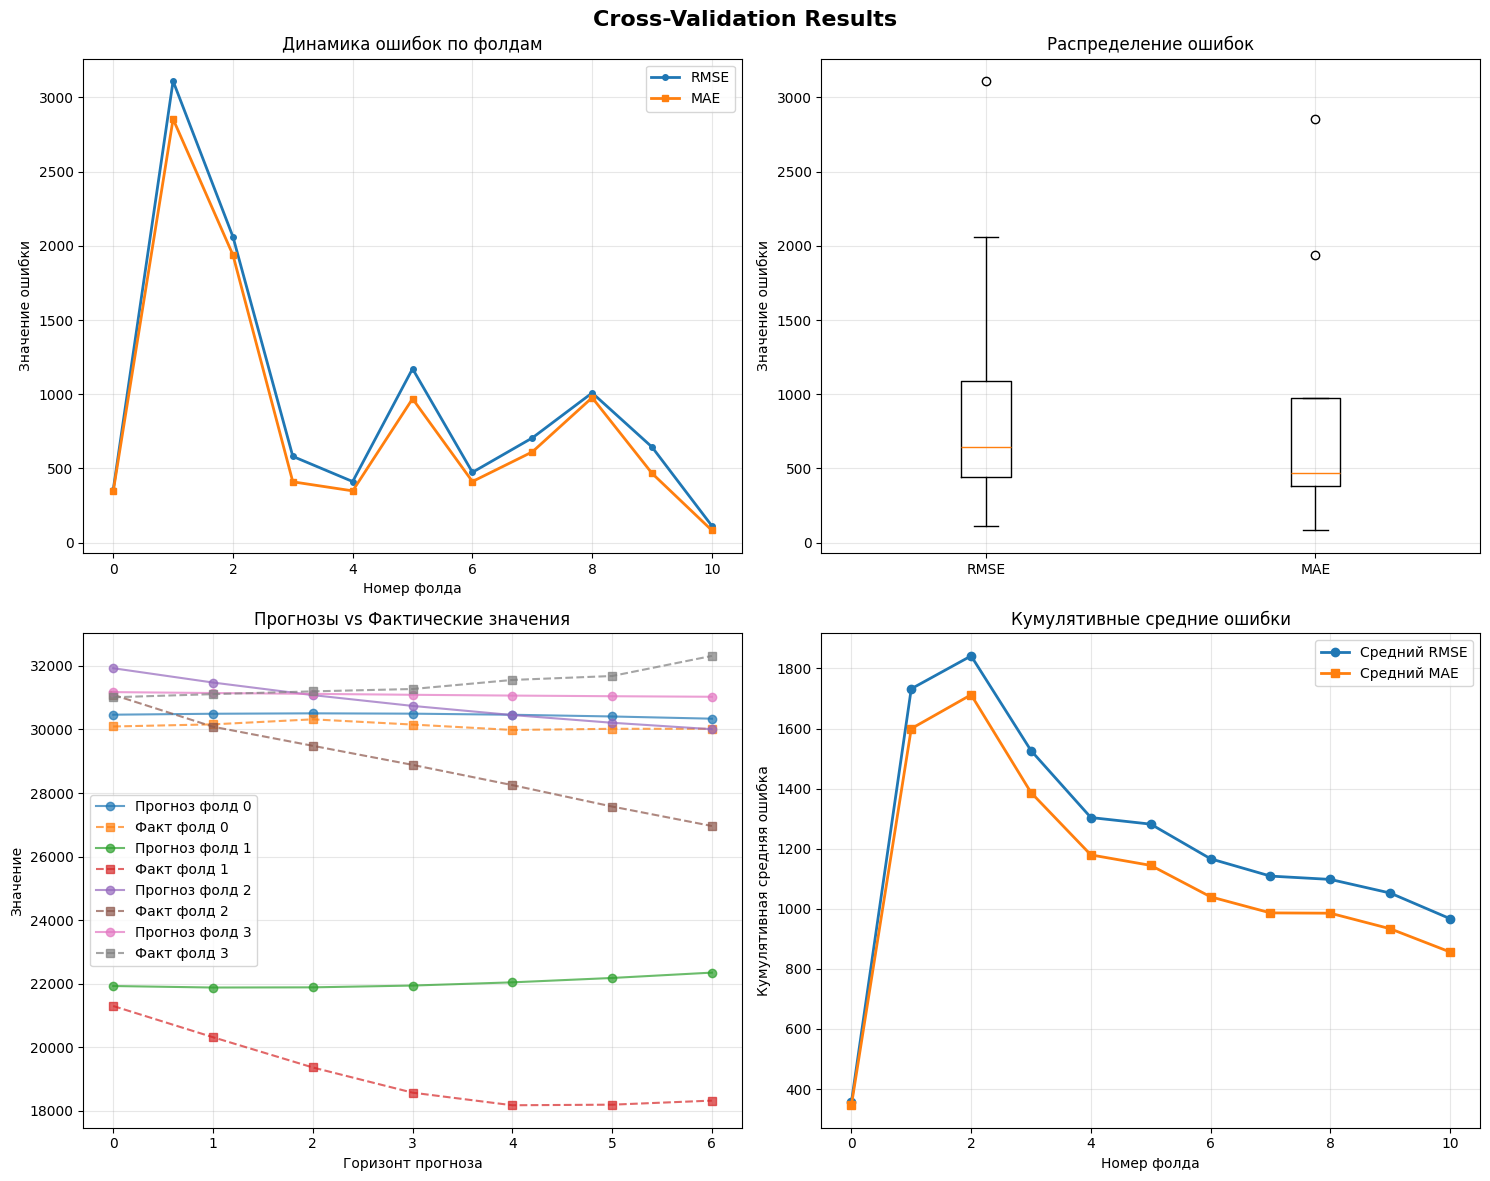


СТАТИСТИКА КРОСС-ВАЛИДАЦИИ
Количество успешных фолдов: 11
RMSE - Среднее: 967.12, Std: 842.30
MAE  - Среднее: 856.27, Std: 792.50
Минимальный RMSE: 113.53 (фолд 10)
Максимальный RMSE: 3109.46 (фолд 1)


In [ ]:
visualize_cv_results(expanding_window_cv(series, recursive_forecast))

/tmp/ipykernel_126759/161380938.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(error_data, labels=['RMSE', 'MAE'])


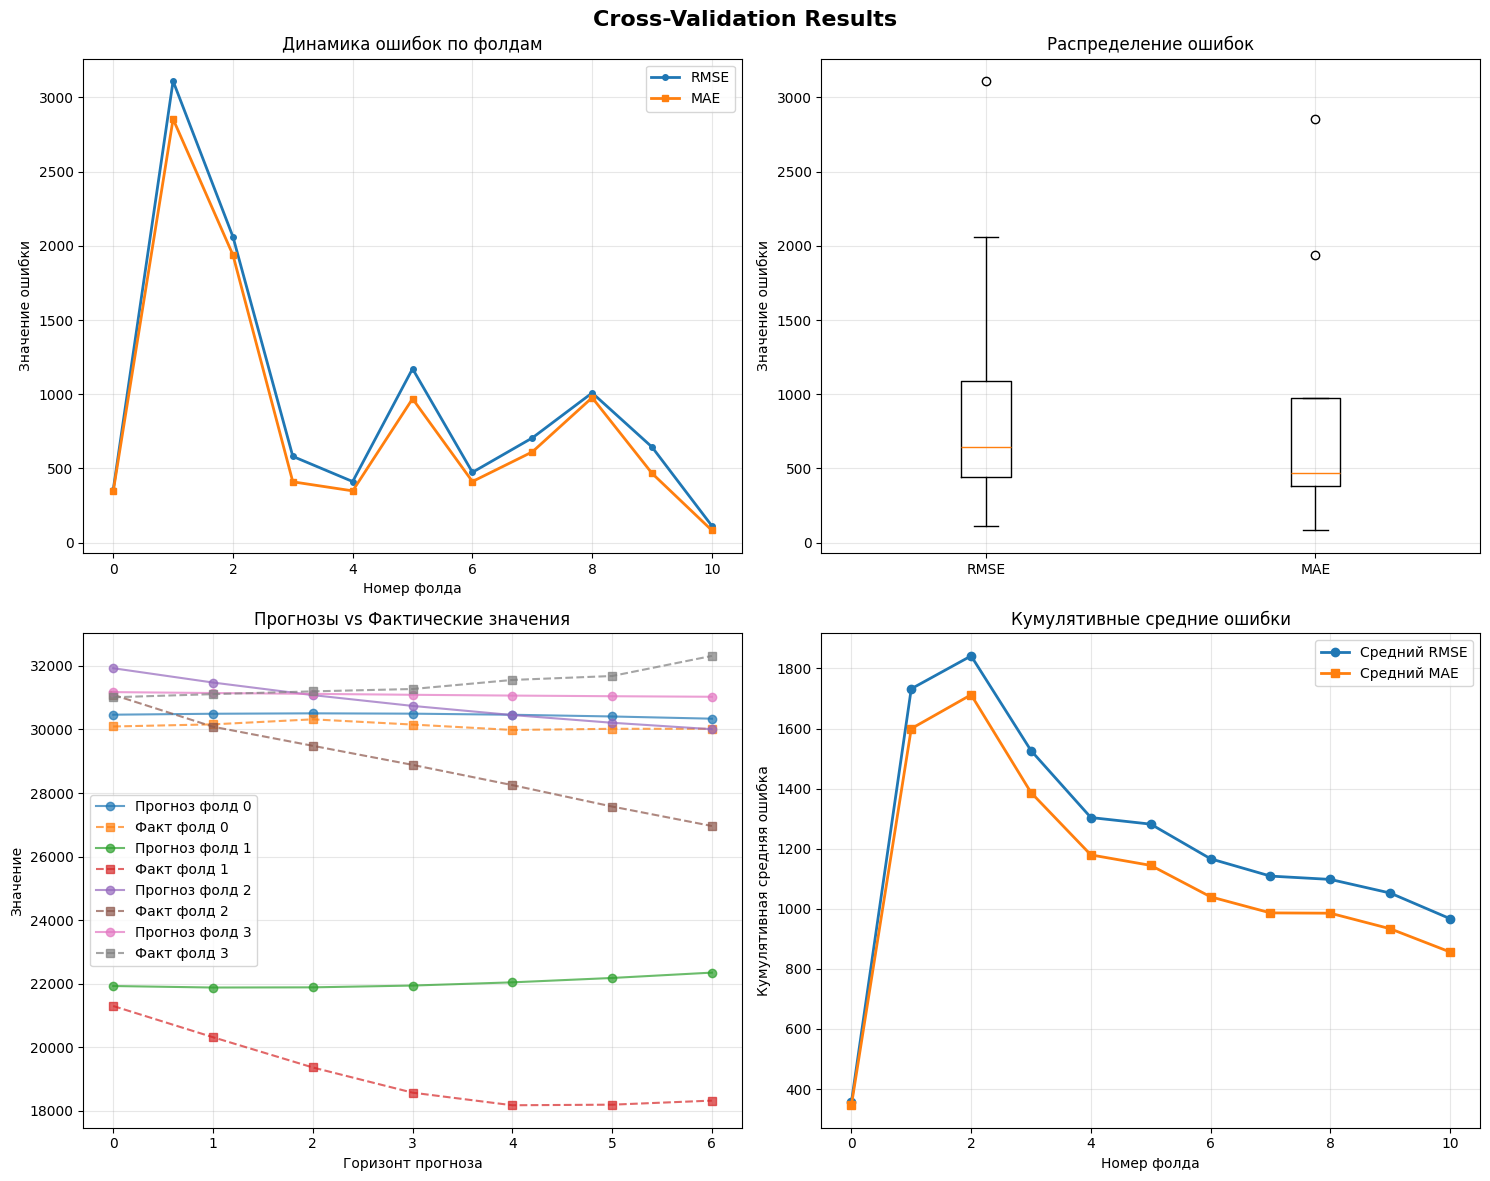


СТАТИСТИКА КРОСС-ВАЛИДАЦИИ
Количество успешных фолдов: 11
RMSE - Среднее: 967.12, Std: 842.30
MAE  - Среднее: 856.27, Std: 792.50
Минимальный RMSE: 113.53 (фолд 10)
Максимальный RMSE: 3109.46 (фолд 1)


In [ ]:
visualize_cv_results(time_series_cv(series, recursive_forecast))

### Этап 5. Построение моделей
Группа	Модели	Особенности


Базовые	AR, MA, ARMA, ARIMA, SARIMA, SARIMAX	Подбор через AIC/BIC или auto_arima


Волатильность	GARCH(1,1)	Обучается на остатках ARIMA


Сезонные	TBATS, Prophet	TBATS — для сложной сезонности; Prophet — для устойчивости


Многомерные	VAR, VECM	Требуют ≥2 рядов; VECM — только при коинтеграции


Бенчмарки	Naive, Seasonal Naive, SES	SES как часть ExponentialSmoothing


Для всех моделей: прогноз, доверительные интервалы (если поддерживается), обратное преобразование Бокса–Кокса.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as scipy_stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

class TimeSeriesDiagnostics:
    """
    Класс для диагностики моделей временных рядов
    """
    
    @staticmethod
    def ljung_box_test(residuals, lags=None, model_df=0):
        """
        Тест Льюнга-Бокса на автокорреляцию остатков
        H0: остатки - белый шум (p > 0.05)
        """
        if lags is None:
            lags = min(10, len(residuals) // 5)
        
        try:
            lb_test = acorr_ljungbox(residuals, lags=lags, model_df=model_df, return_df=True)
            p_value = lb_test['lb_pvalue'].iloc[-1]
            return p_value, p_value > 0.05
        except Exception as e:
            print(f"Ошибка в тесте Льюнга-Бокса: {e}")
            return None, False
    
    @staticmethod
    def breusch_pagan_test(residuals, exog=None):
        """
        Тест Бройша-Пагана на гомоскедастичность
        H0: гомоскедастичность (p > 0.05)
        """
        try:
            # Создаем матрицу регрессоров если не предоставлена
            if exog is None:
                exog = np.column_stack([np.ones(len(residuals)), 
                                      np.arange(len(residuals))])
            
            # Квадраты остатков как зависимая переменная
            resid_squared = residuals ** 2
            
            # Проверяем размерности
            if len(resid_squared) != exog.shape[0]:
                raise ValueError("Несовпадение размерностей")
                
            bp_test = het_breuschpagan(resid_squared, exog)
            p_value = bp_test[1]
            return p_value, p_value > 0.05
        except Exception as e:
            print(f"Ошибка в тесте Бройша-Пагана: {e}")
            return None, False
    
    @staticmethod
    def shapiro_wilk_test(residuals):
        """
        Тест Шапиро-Уилка на нормальность распределения
        H0: нормальное распределение (p > 0.05)
        """
        try:
            # Тест Шапиро-Уилка работает для выборок размером от 3 до 5000
            if len(residuals) < 3:
                return None, False
            if len(residuals) > 5000:
                # Для больших выборок берем случайную подвыборку
                residuals = np.random.choice(residuals, 5000, replace=False)
            
            stat, p_value = scipy_stats.shapiro(residuals)
            return p_value, p_value > 0.05
        except Exception as e:
            print(f"Ошибка в тесте Шапиро-Уилка: {e}")
            return None, False
    
    @staticmethod
    def plot_diagnostics(residuals, predictions, actual, model_name, horizon):
        """
        Визуализация диагностических графиков
        """
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f'Диагностика модели {model_name} (горизонт {horizon})', fontsize=16)
        
        # 1. Исходный ряд и прогноз
        axes[0, 0].plot(actual, label='Факт', alpha=0.7)
        axes[0, 0].plot(predictions, label='Прогноз', alpha=0.7)
        axes[0, 0].fill_between(range(len(predictions)), 
                               predictions - 1.96 * np.std(residuals),
                               predictions + 1.96 * np.std(residuals),
                               alpha=0.2, label='95% ДИ')
        axes[0, 0].set_title('Ряд и прогноз')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Остатки
        axes[0, 1].plot(residuals)
        axes[0, 1].axhline(y=0, color='r', linestyle='--')
        axes[0, 1].set_title('Остатки модели')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. ACF остатков
        plot_acf(residuals, ax=axes[0, 2], lags=min(20, len(residuals)//4))
        axes[0, 2].set_title('ACF остатков')
        
        # 4. PACF остатков
        plot_pacf(residuals, ax=axes[1, 0], lags=min(20, len(residuals)//4))
        axes[1, 0].set_title('PACF остатков')
        
        # 5. Q-Q plot
        stats.probplot(residuals, dist="norm", plot=axes[1, 1])
        axes[1, 1].set_title('Q-Q plot остатков')
        
        # 6. Гистограмма остатков
        axes[1, 2].hist(residuals, bins=20, density=True, alpha=0.7, edgecolor='black')
        xmin, xmax = axes[1, 2].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
        axes[1, 2].plot(x, p, 'k', linewidth=2)
        axes[1, 2].set_title('Распределение остатков')
        axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def full_diagnostic(train_series, test_series, predictions, model_name, horizon):
        """
        Полная диагностика модели
        """
        print(f"\n{'='*60}")
        print(f"ДИАГНОСТИКА МОДЕЛИ: {model_name} (горизонт {horizon})")
        print(f"{'='*60}")
        
        # Вычисляем остатки
        residuals = test_series - predictions
        
        # 1. Тест Льюнга-Бокса
        lb_p, lb_result = TimeSeriesDiagnostics.ljung_box_test(residuals)
        print(f"Тест Льюнга-Бокса (белый шум): p-value = {lb_p:.4f} -> {'✓ Белый шум' if lb_result else '✗ Не белый шум'}")
        
        # 2. Тест Бройша-Пагана
        bp_p, bp_result = TimeSeriesDiagnostics.breusch_pagan_test(residuals)
        print(f"Тест Бройша-Пагана (гомоскедастичность): p-value = {bp_p:.4f} -> {'✓ Гомоскедастичность' if bp_result else '✗ Гетероскедастичность'}")
        
        # 3. Тест Шапиро-Уилка
        sw_p, sw_result = TimeSeriesDiagnostics.shapiro_wilk_test(residuals)
        print(f"Тест Шапиро-Уилка (нормальность): p-value = {sw_p:.4f} -> {'✓ Нормальность' if sw_result else '✗ Не нормальность'}")
        
        # 4. Дополнительная статистика
        print(f"\nДополнительная статистика:")
        print(f"Среднее остатков: {np.mean(residuals):.4f}")
        print(f"Стандартное отклонение остатков: {np.std(residuals):.4f}")
        print(f"СКО: {np.sqrt(np.mean(residuals**2)):.4f}")
        print(f"Максимальная ошибка: {np.max(np.abs(residuals)):.4f}")
        
        # 5. Визуализация
        TimeSeriesDiagnostics.plot_diagnostics(residuals, predictions, test_series, model_name, horizon)
        
        return {
            'residuals': residuals,
            'lb_test': (lb_p, lb_result),
            'bp_test': (bp_p, bp_result),
            'sw_test': (sw_p, sw_result),
            'rmse': np.sqrt(np.mean(residuals**2)),
            'mae': np.mean(np.abs(residuals))
        }

Сравнение моделей через CV:
Тестируем AR (lag=1)...
  AR (lag=1): RMSE = 1118.90 (фолдов: 11)
Тестируем AR (lag=3)...
  AR (lag=3): RMSE = 1065.22 (фолдов: 11)
Тестируем MA (window=3)...
  MA (window=3): RMSE = 1542.80 (фолдов: 11)
Тестируем MA (window=5)...
  MA (window=5): RMSE = 1956.04 (фолдов: 11)
Тестируем ARMA (1,1)...
  ARMA (1,1): RMSE = 990.01 (фолдов: 11)
Тестируем ARIMA (1,1,1)...
  ARIMA (1,1,1): RMSE = 1042.31 (фолдов: 11)
Тестируем SARIMA (7)...
  SARIMA (7): RMSE = 1039.91 (фолдов: 11)


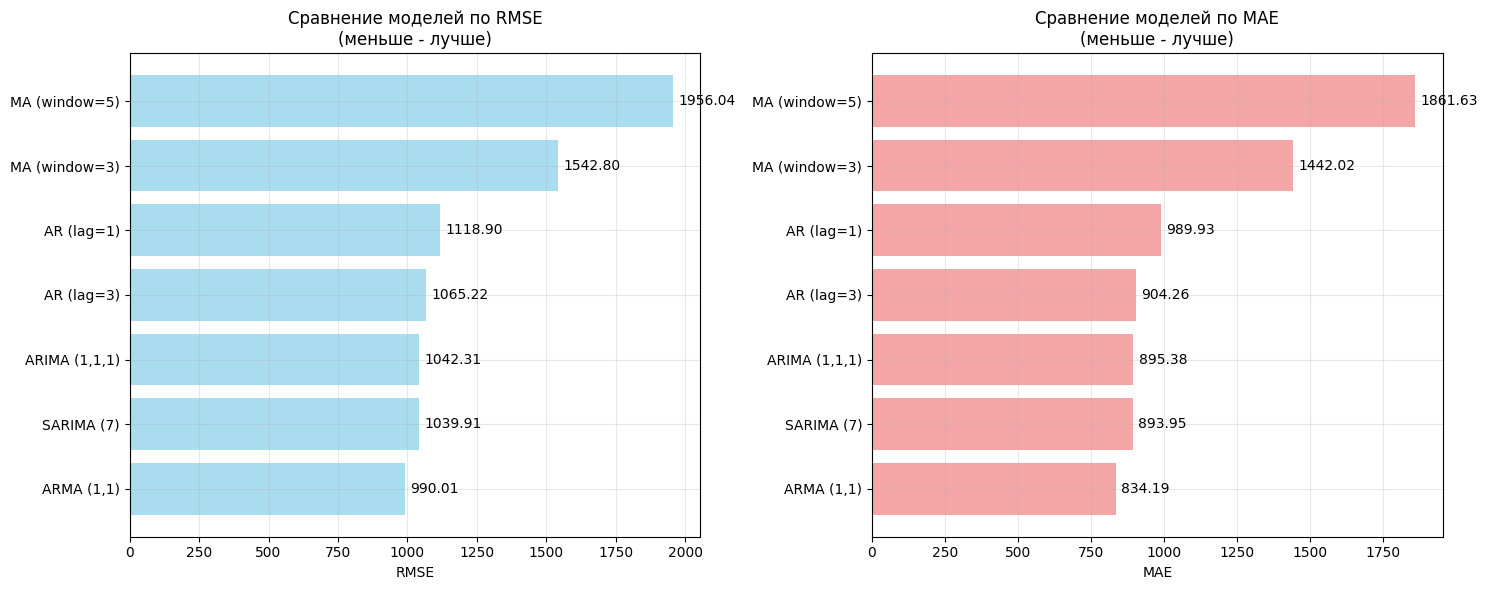


РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ
Модель               RMSE       MAE        Std RMSE     Фолды     
------------------------------------------------------------
ARMA (1,1)           990.01     834.19     852.65       11        
SARIMA (7)           1039.91    893.95     1147.54      11        
ARIMA (1,1,1)        1042.31    895.38     1087.61      11        
AR (lag=3)           1065.22    904.26     1044.69      11        
AR (lag=1)           1118.90    989.93     930.42       11        
MA (window=3)        1542.80    1442.02    1278.25      11        
MA (window=5)        1956.04    1861.63    1752.17      11        

Тест отдельных моделей на последних данных:
AR (lag=2): [34389.49113376 33761.37303127 33268.64239636 32881.11428797
 32575.36646625]
ARIMA (1,1,1): [34537.25882658 34074.95561829 33748.47955827 33517.92390593
 33355.10673391]
SARIMA: [34420.63277765 33833.99950625 33287.01549198 32844.09040347
 32561.73251149]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

class TimeSeriesModels:
    """
    Класс для работы с базовыми моделями временных рядов
    """

    @staticmethod
    def ar_model(train_series, test_horizon, lag=1):
        """
        AR (Autoregressive) модель
        """
        try:
            model = AutoReg(train_series, lags=lag)
            fitted_model = model.fit()
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions)
        except Exception as e:
            print(f"Ошибка в AR модели: {e}")
            return np.full(test_horizon, train_series[-1])

    @staticmethod
    def ma_model(train_series, test_horizon, window=3):
        """
        MA (Moving Average) - скользящее среднее
        """
        try:
            # Используем скользящее среднее
            if len(train_series) >= window:
                ma_value = np.mean(train_series[-window:])
            else:
                ma_value = np.mean(train_series)
            return np.full(test_horizon, ma_value)
        except Exception as e:
            print(f"Ошибка в MA модели: {e}")
            return np.full(test_horizon, train_series[-1])

    @staticmethod
    def arma_model(train_series, test_horizon, order=(1, 0, 1)):
        """
        ARMA (Autoregressive Moving Average) модель
        """
        try:
            # ARMA это ARIMA с d=0
            model = ARIMA(train_series, order=(order[0], 0, order[2]))
            fitted_model = model.fit()
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions)
        except Exception as e:
            print(f"Ошибка в ARMA модели: {e}")
            return np.full(test_horizon, train_series[-1])

    @staticmethod
    def arima_model(train_series, test_horizon, order=(1, 1, 1)):
        """
        ARIMA (Autoregressive Integrated Moving Average) модель
        """
        try:
            model = ARIMA(train_series, order=order)
            fitted_model = model.fit()
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions)
        except Exception as e:
            print(f"Ошибка в ARIMA модели: {e}")
            return np.full(test_horizon, train_series[-1])

    @staticmethod
    def sarima_model(train_series, test_horizon, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)):
        """
        SARIMA (Seasonal ARIMA) модель
        """
        try:
            model = SARIMAX(train_series,
                          order=order,
                          seasonal_order=seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            fitted_model = model.fit(disp=False)
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions)
        except Exception as e:
            print(f"Ошибка в SARIMA модели: {e}")
            return np.full(test_horizon, train_series[-1])

# Функции-обертки для совместимости с CV
def create_model_wrapper(model_func, **model_params):
    """
    Создает обертку для модели, чтобы она была совместима с CV функцией
    """
    def wrapper(train_series, test_horizon, **kwargs):
        # Объединяем переданные параметры с параметрами модели
        all_params = {**model_params, **kwargs}
        return model_func(train_series, test_horizon, **all_params)
    return wrapper

# Специфичные обертки для каждой модели
def ar_wrapper(lag=1):
    return create_model_wrapper(TimeSeriesModels.ar_model, lag=lag)

def ma_wrapper(window=3):
    return create_model_wrapper(TimeSeriesModels.ma_model, window=window)

def arma_wrapper(p=1, q=1):
    return create_model_wrapper(TimeSeriesModels.arma_model, order=(p, 0, q))

def arima_wrapper(p=1, d=1, q=1):
    return create_model_wrapper(TimeSeriesModels.arima_model, order=(p, d, q))

def sarima_wrapper(p=1, d=1, q=1, P=1, D=1, Q=1, s=7):
    return create_model_wrapper(TimeSeriesModels.sarima_model,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s))

# Функция сравнения моделей
def compare_models(series, cv_function, h=7, min_train_size=100):
    """
    Сравнение разных моделей временных рядов
    """
    models = {
        'AR (lag=1)': ar_wrapper(lag=1),
        'AR (lag=3)': ar_wrapper(lag=3),
        'MA (window=3)': ma_wrapper(window=3),
        'MA (window=5)': ma_wrapper(window=5),
        'ARMA (1,1)': arma_wrapper(p=1, q=1),
        'ARIMA (1,1,1)': arima_wrapper(p=1, d=1, q=1),
        'SARIMA (7)': sarima_wrapper(s=7)
    }

    results = {}

    for model_name, model_func in models.items():
        print(f"Тестируем {model_name}...")
        try:
            # Передаем только необходимые параметры
            cv_results = cv_function(series, model_func,
                                   min_train_size=min_train_size,
                                   h=h)

            if len(cv_results['rmse']) > 0:
                results[model_name] = {
                    'mean_rmse': np.mean(cv_results['rmse']),
                    'mean_mae': np.mean(cv_results['mae']),
                    'std_rmse': np.std(cv_results['rmse']),
                    'num_folds': len(cv_results['rmse']),
                    'cv_results': cv_results
                }
                print(f"  {model_name}: RMSE = {results[model_name]['mean_rmse']:.2f} (фолдов: {results[model_name]['num_folds']})")
            else:
                print(f"  {model_name}: нет успешных фолдов")
                results[model_name] = None

        except Exception as e:
            print(f"  Ошибка в {model_name}: {e}")
            results[model_name] = None

    return results

# Визуализация результатов сравнения
def plot_model_comparison(comparison_results):
    """
    Визуализация сравнения моделей
    """
    if not comparison_results:
        print("Нет результатов для визуализации")
        return

    # Фильтруем успешные модели
    successful_models = {k: v for k, v in comparison_results.items()
                        if v is not None and v['num_folds'] > 0}

    if not successful_models:
        print("Нет успешных моделей для сравнения")
        return

    model_names = list(successful_models.keys())
    rmse_scores = [successful_models[name]['mean_rmse'] for name in model_names]
    mae_scores = [successful_models[name]['mean_mae'] for name in model_names]

    # Сортируем по RMSE
    sorted_indices = np.argsort(rmse_scores)
    model_names = [model_names[i] for i in sorted_indices]
    rmse_scores = [rmse_scores[i] for i in sorted_indices]
    mae_scores = [mae_scores[i] for i in sorted_indices]

    # Создаем графики
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # График RMSE
    bars1 = ax1.barh(model_names, rmse_scores, color='skyblue', alpha=0.7)
    ax1.set_xlabel('RMSE')
    ax1.set_title('Сравнение моделей по RMSE\n(меньше - лучше)')
    ax1.grid(True, alpha=0.3)

    # Добавляем значения на bars
    for bar, value in zip(bars1, rmse_scores):
        ax1.text(bar.get_width() + max(rmse_scores) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}',
                ha='left', va='center')

    # График MAE
    bars2 = ax2.barh(model_names, mae_scores, color='lightcoral', alpha=0.7)
    ax2.set_xlabel('MAE')
    ax2.set_title('Сравнение моделей по MAE\n(меньше - лучше)')
    ax2.grid(True, alpha=0.3)

    for bar, value in zip(bars2, mae_scores):
        ax2.text(bar.get_width() + max(mae_scores) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}',
                ha='left', va='center')

    plt.tight_layout()
    plt.show()

    # Выводим таблицу результатов
    print("\n" + "="*60)
    print("РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ")
    print("="*60)
    print(f"{'Модель':<20} {'RMSE':<10} {'MAE':<10} {'Std RMSE':<12} {'Фолды':<10}")
    print("-" * 60)

    for name in model_names:
        result = successful_models[name]
        print(f"{name:<20} {result['mean_rmse']:<10.2f} {result['mean_mae']:<10.2f} "
              f"{result['std_rmse']:<12.2f} {result['num_folds']:<10}")


series = new_df[y_col].values

print("Сравнение моделей через CV:")
comparison_results = compare_models(series, time_series_cv, h=5, min_train_size=120)

# Визуализация результатов
plot_model_comparison(comparison_results)

# Тестируем отдельные модели на небольшом наборе
print("\nТест отдельных моделей на последних данных:")
train_data = series[:250]
test_horizon = 5

models_to_test = {
    'AR (lag=2)': TimeSeriesModels.ar_model(train_data, test_horizon, lag=2),
    'ARIMA (1,1,1)': TimeSeriesModels.arima_model(train_data, test_horizon, order=(1, 1, 1)),
    'SARIMA': TimeSeriesModels.sarima_model(train_data, test_horizon)
}

for model_name, predictions in models_to_test.items():
    print(f"{model_name}: {predictions}")

ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ БЕЗ КРОСС-ВАЛИДАЦИИ
Используем подвыборку из 1000 наблюдений
Диапазон данных: 18045.57 - 43831.90
Train size: 800, Test size: 30
Train range: 20542.78 - 43035.95
Test range: 43175.70 - 32992.41

🔍 Тестируем AR (lag=1)...
  ✅ RMSE: 4064.50, MAE: 2838.96
  📊 Уникальных прогнозов: 30
  📈 Прогнозы: [43029.92575671 43023.91777234 43017.92537634]...

🔍 Тестируем AR (lag=3)...
  ✅ RMSE: 1210.77, MAE: 956.07
  📊 Уникальных прогнозов: 30
  📈 Прогнозы: [43280.53173327 43404.57010841 43426.75878803]...

🔍 Тестируем MA (window=3)...
  ✅ RMSE: 3916.06, MAE: 2639.73
  📊 Уникальных прогнозов: 1
  📈 Прогнозы: [42675.44304 42675.44304 42675.44304]...

🔍 Тестируем MA (window=5)...
  ✅ RMSE: 3253.70, MAE: 2247.74
  📊 Уникальных прогнозов: 1
  📈 Прогнозы: [41458.632914 41458.632914 41458.632914]...

🔍 Тестируем ARMA (1,1)...
  ✅ RMSE: 3587.87, MAE: 2481.75
  📊 Уникальных прогнозов: 30
  📈 Прогнозы: [43309.66131139 43258.78543129 43208.10229661]...

🔍 Тестируем ARIMA (1,1,1)...
  ✅

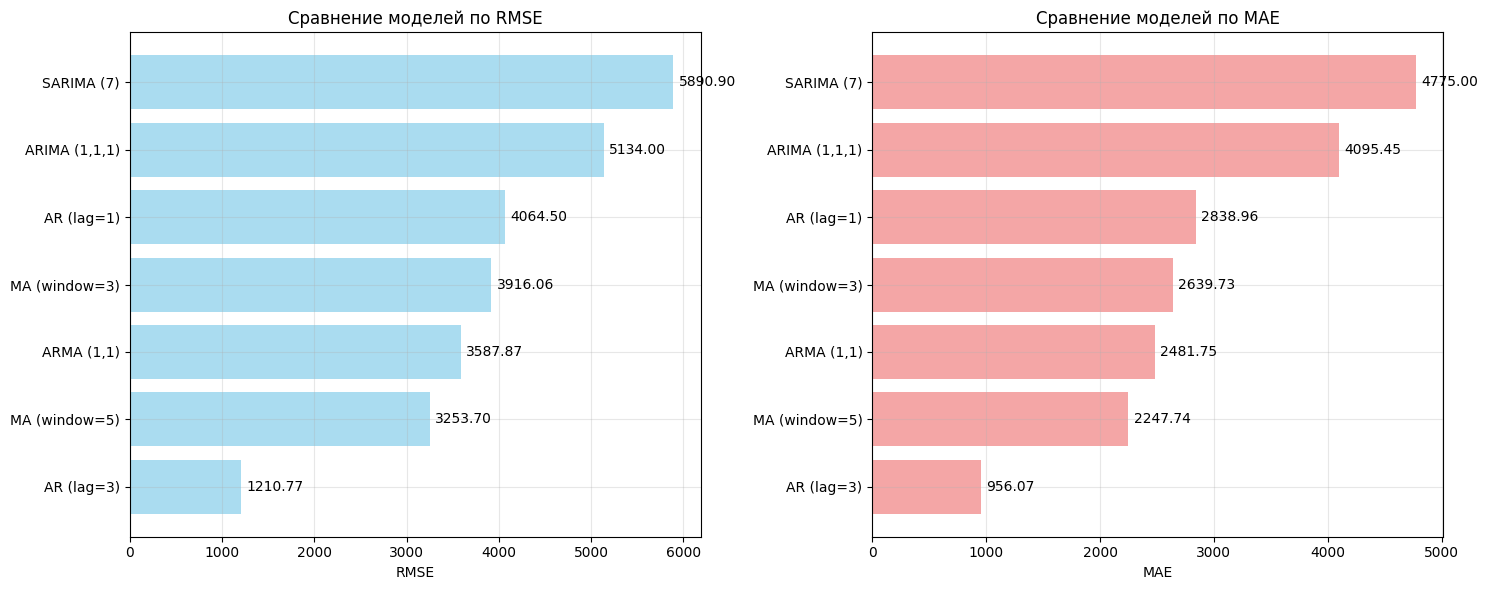


РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ
Модель               RMSE       MAE        Уник. прогнозов
--------------------------------------------------------------------------------
AR (lag=3)           1210.77    956.07     30             
MA (window=5)        3253.70    2247.74    1              
ARMA (1,1)           3587.87    2481.75    30             
MA (window=3)        3916.06    2639.73    1              
AR (lag=1)           4064.50    2838.96    30             
ARIMA (1,1,1)        5134.00    4095.45    30             
SARIMA (7)           5890.90    4775.00    30             


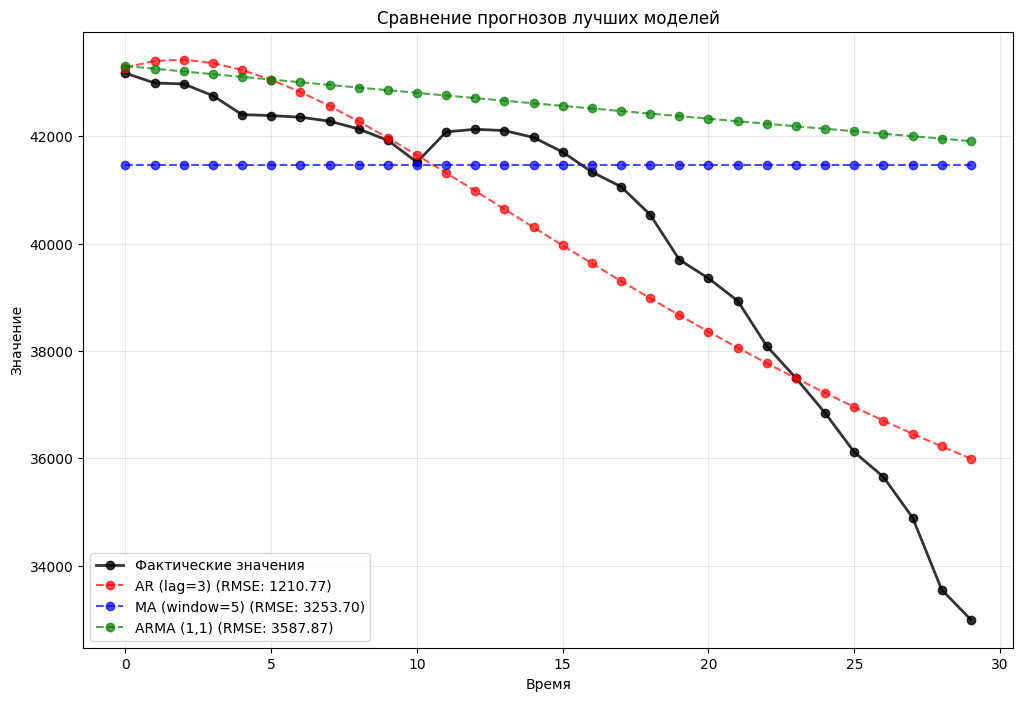


ДИАГНОСТИКА ТОП-3 МОДЕЛЕЙ

📊 Модель: AR (lag=3)
   RMSE: 1210.77, MAE: 956.07
   Тест Льюнга-Бокса: p=0.3191 ✓
   Тест Бройша-Пагана: p=0.2765 ✓
   Тест Шапиро-Уилка: p=0.0000 ✗


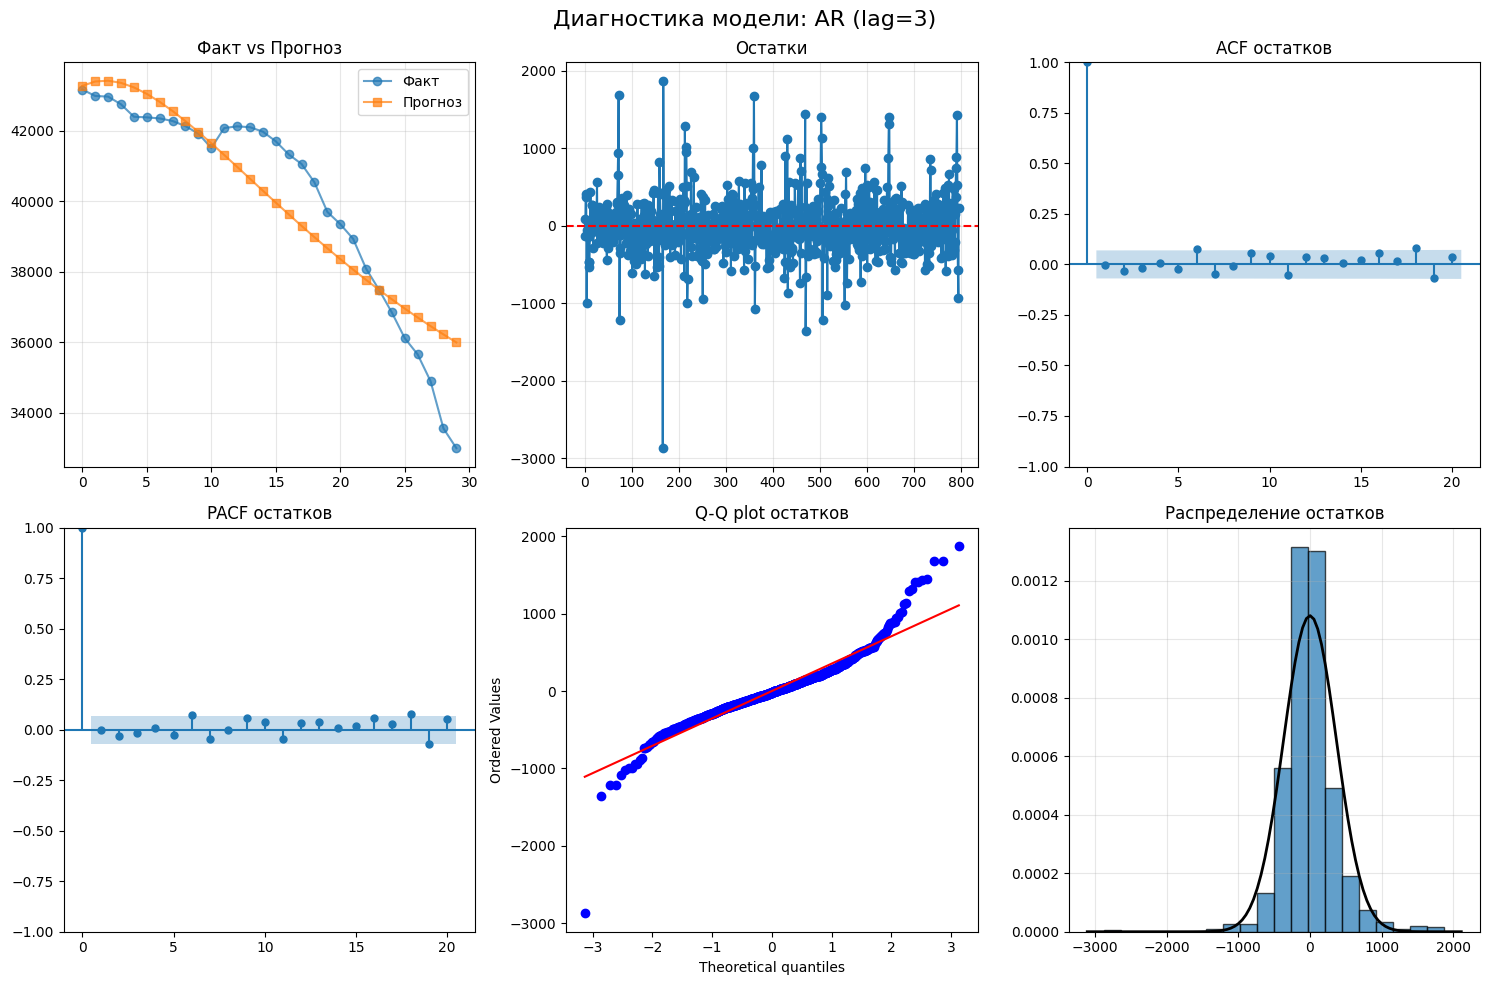


📊 Модель: MA (window=5)
   RMSE: 3253.70, MAE: 2247.74
   Тест Льюнга-Бокса: p=0.0000 ✗
   Тест Бройша-Пагана: p=0.0012 ✗
   Тест Шапиро-Уилка: p=0.0003 ✗


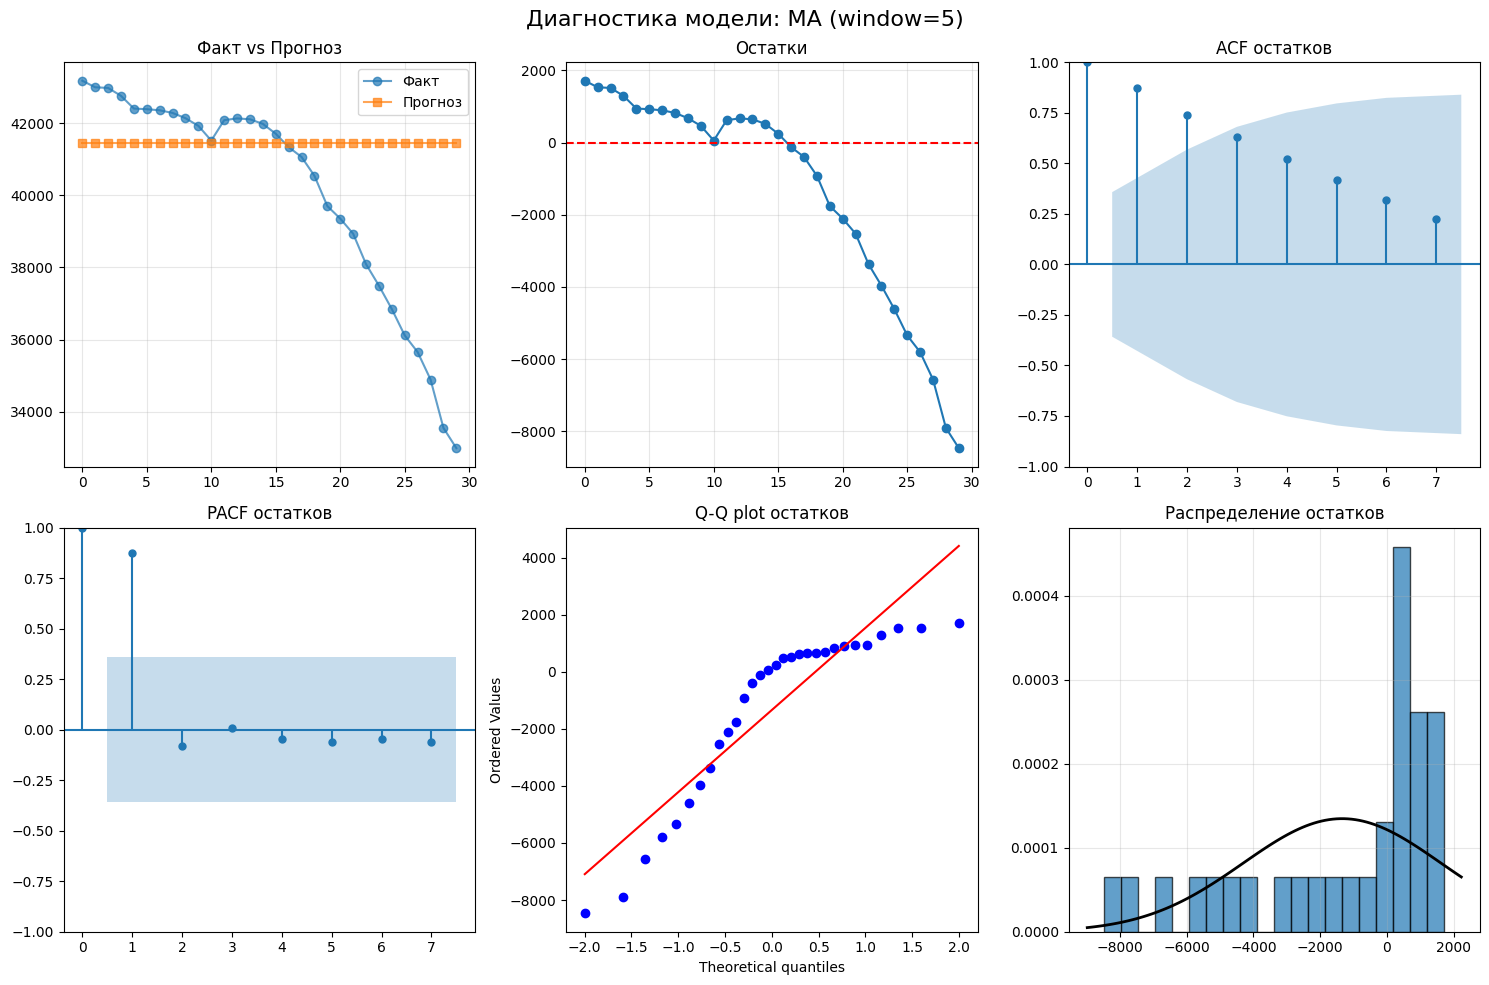


📊 Модель: ARMA (1,1)
   RMSE: 3587.87, MAE: 2481.75
   Тест Льюнга-Бокса: p=0.0000 ✗
   Тест Бройша-Пагана: p=0.0823 ✓
   Тест Шапиро-Уилка: p=0.0000 ✗


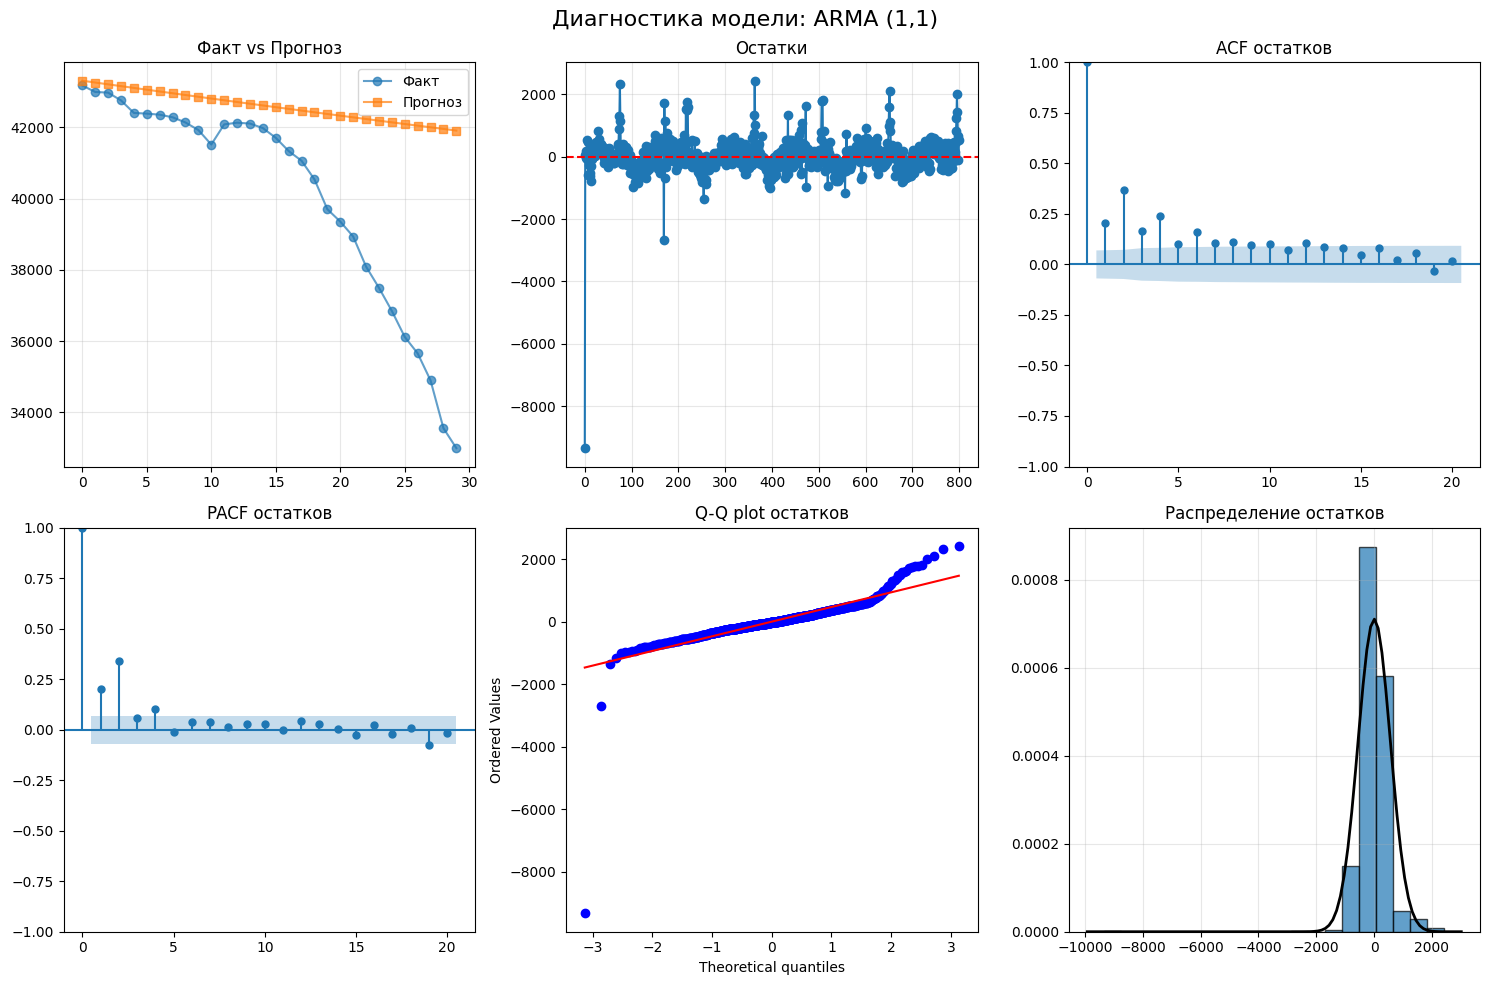

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class TimeSeriesModels:
    """
    Класс для работы с базовыми моделями временных рядов
    """

    @staticmethod
    def ar_model(train_series, test_horizon, lag=1):
        """
        AR (Autoregressive) модель
        """
        try:
            model = AutoReg(train_series, lags=lag)
            fitted_model = model.fit()
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions), fitted_model
        except Exception as e:
            print(f"Ошибка в AR модели: {e}")
            return np.full(test_horizon, train_series[-1]), None

    @staticmethod
    def ma_model(train_series, test_horizon, window=3):
        """
        MA (Moving Average) - скользящее среднее
        """
        try:
            # Используем скользящее среднее
            if len(train_series) >= window:
                ma_value = np.mean(train_series[-window:])
            else:
                ma_value = np.mean(train_series)
            return np.full(test_horizon, ma_value), None
        except Exception as e:
            print(f"Ошибка в MA модели: {e}")
            return np.full(test_horizon, train_series[-1]), None

    @staticmethod
    def arma_model(train_series, test_horizon, order=(1, 0, 1)):
        """
        ARMA (Autoregressive Moving Average) модель
        """
        try:
            # ARMA это ARIMA с d=0
            model = ARIMA(train_series, order=(order[0], 0, order[2]))
            fitted_model = model.fit()
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions), fitted_model
        except Exception as e:
            print(f"Ошибка в ARMA модели: {e}")
            return np.full(test_horizon, train_series[-1]), None

    @staticmethod
    def arima_model(train_series, test_horizon, order=(1, 1, 1)):
        """
        ARIMA (Autoregressive Integrated Moving Average) модель
        """
        try:
            model = ARIMA(train_series, order=order)
            fitted_model = model.fit()
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions), fitted_model
        except Exception as e:
            print(f"Ошибка в ARIMA модели: {e}")
            return np.full(test_horizon, train_series[-1]), None

    @staticmethod
    def sarima_model(train_series, test_horizon, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)):
        """
        SARIMA (Seasonal ARIMA) модель
        """
        try:
            model = SARIMAX(train_series,
                          order=order,
                          seasonal_order=seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            fitted_model = model.fit(disp=False)
            predictions = fitted_model.forecast(steps=test_horizon)
            return np.array(predictions), fitted_model
        except Exception as e:
            print(f"Ошибка в SARIMA модели: {e}")
            return np.full(test_horizon, train_series[-1]), None

def compare_models_simple(series, test_size=50, train_size=None):
    """
    Сравнение моделей на простом train/test разделении
    """
    if train_size is None:
        train_size = len(series) - test_size
    
    # Проверяем, что размеры корректные
    if train_size + test_size > len(series):
        train_size = len(series) - test_size
        print(f"⚠️  Корректируем train_size на {train_size}")
    
    train_data = series[:train_size]
    test_data = series[train_size:train_size + test_size]
    
    print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")
    
    # Проверяем, что test_data не пустой
    if len(test_data) == 0:
        print("❌ Ошибка: test_data пустой!")
        return {}
    
    print(f"Train range: {train_data[0]:.2f} - {train_data[-1]:.2f}")
    print(f"Test range: {test_data[0]:.2f} - {test_data[-1]:.2f}")
    
    models = {
        'AR (lag=1)': {'func': TimeSeriesModels.ar_model, 'params': {'lag': 1}},
        'AR (lag=3)': {'func': TimeSeriesModels.ar_model, 'params': {'lag': 3}},
        'MA (window=3)': {'func': TimeSeriesModels.ma_model, 'params': {'window': 3}},
        'MA (window=5)': {'func': TimeSeriesModels.ma_model, 'params': {'window': 5}},
        'ARMA (1,1)': {'func': TimeSeriesModels.arma_model, 'params': {'order': (1, 0, 1)}},
        'ARIMA (1,1,1)': {'func': TimeSeriesModels.arima_model, 'params': {'order': (1, 1, 1)}},
        'SARIMA (7)': {'func': TimeSeriesModels.sarima_model, 'params': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 7)}}
    }
    
    results = {}
    
    for model_name, model_info in models.items():
        print(f"\n🔍 Тестируем {model_name}...")
        
        try:
            predictions, fitted_model = model_info['func'](train_data, test_size, **model_info['params'])
            
            if len(predictions) != len(test_data):
                print(f"  ❌ Размер прогнозов не совпадает: {len(predictions)} != {len(test_data)}")
                results[model_name] = None
                continue
            
            # Вычисляем метрики
            rmse = np.sqrt(np.mean((test_data - predictions) ** 2))
            mae = np.mean(np.abs(test_data - predictions))
            
            # Проверяем уникальность прогнозов
            unique_predictions = len(np.unique(predictions))
            
            print(f"  ✅ RMSE: {rmse:.2f}, MAE: {mae:.2f}")
            print(f"  📊 Уникальных прогнозов: {unique_predictions}")
            print(f"  📈 Прогнозы: {predictions[:3]}...")
            
            results[model_name] = {
                'predictions': predictions,
                'rmse': rmse,
                'mae': mae,
                'fitted_model': fitted_model,
                'unique_predictions': unique_predictions,
                'test_data': test_data,
                'train_data': train_data
            }
            
        except Exception as e:
            print(f"  ❌ Ошибка: {e}")
            results[model_name] = None
    
    return results


def plot_comparison_simple(results):
    """
    Визуализация сравнения моделей без CV
    """
    if not results:
        print("Нет результатов для визуализации")
        return
    
    # Фильтруем успешные модели
    successful_models = {k: v for k, v in results.items() if v is not None}
    
    if not successful_models:
        print("Нет успешных моделей для сравнения")
        return
    
    # Сортируем по RMSE
    sorted_models = sorted(successful_models.items(), key=lambda x: x[1]['rmse'])
    
    # График сравнения RMSE
    model_names = [model[0] for model in sorted_models]
    rmse_scores = [model[1]['rmse'] for model in sorted_models]
    mae_scores = [model[1]['mae'] for model in sorted_models]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График RMSE
    bars1 = ax1.barh(model_names, rmse_scores, color='skyblue', alpha=0.7)
    ax1.set_xlabel('RMSE')
    ax1.set_title('Сравнение моделей по RMSE')
    ax1.grid(True, alpha=0.3)
    
    for bar, value in zip(bars1, rmse_scores):
        ax1.text(bar.get_width() + max(rmse_scores) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}',
                ha='left', va='center')
    
    # График MAE
    bars2 = ax2.barh(model_names, mae_scores, color='lightcoral', alpha=0.7)
    ax2.set_xlabel('MAE')
    ax2.set_title('Сравнение моделей по MAE')
    ax2.grid(True, alpha=0.3)
    
    for bar, value in zip(bars2, mae_scores):
        ax2.text(bar.get_width() + max(mae_scores) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}',
                ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Таблица результатов
    print("\n" + "="*80)
    print("РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ")
    print("="*80)
    print(f"{'Модель':<20} {'RMSE':<10} {'MAE':<10} {'Уник. прогнозов':<15}")
    print("-" * 80)
    
    for model_name, result in sorted_models:
        print(f"{model_name:<20} {result['rmse']:<10.2f} {result['mae']:<10.2f} {result['unique_predictions']:<15}")

def plot_predictions_comparison(results, top_n=3):
    """
    Визуализация прогнозов лучших моделей
    """
    if not results:
        return
    
    successful_models = {k: v for k, v in results.items() if v is not None}
    if not successful_models:
        return
    
    # Берем топ-N моделей по RMSE
    top_models = sorted(successful_models.items(), key=lambda x: x[1]['rmse'])[:top_n]
    
    # Берем тестовые данные из первой успешной модели
    test_data = list(top_models)[0][1]['test_data']
    
    plt.figure(figsize=(12, 8))
    
    # Временные индексы
    time_idx = range(len(test_data))
    
    # Фактические значения
    plt.plot(time_idx, test_data, 'ko-', label='Фактические значения', 
             linewidth=2, markersize=6, alpha=0.8)
    
    # Прогнозы каждой модели
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i, (model_name, result) in enumerate(top_models):
        if i < len(colors):
            plt.plot(time_idx, result['predictions'], 
                    color=colors[i], marker='o', linestyle='--',
                    label=f'{model_name} (RMSE: {result["rmse"]:.2f})',
                    alpha=0.7)
    
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.title('Сравнение прогнозов лучших моделей')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


class TimeSeriesDiagnostics:
    """
    Класс для диагностики моделей временных рядов
    """
    
    @staticmethod
    def ljung_box_test(residuals, lags=None):
        """Тест Льюнга-Бокса на белый шум"""
        if residuals is None or len(residuals) < 5:
            return None, False
        if lags is None:
            lags = min(10, len(residuals) // 5)
        try:
            lb_test = acorr_ljungbox(residuals, lags=lags, return_df=True)
            p_value = lb_test['lb_pvalue'].iloc[-1]
            return p_value, p_value > 0.05
        except:
            return None, False
    
    @staticmethod
    def breusch_pagan_test(residuals):
        """Тест Бройша-Пагана на гомоскедастичность"""
        if residuals is None or len(residuals) < 5:
            return None, False
        try:
            exog = np.column_stack([np.ones(len(residuals)), np.arange(len(residuals))])
            resid_squared = residuals ** 2
            bp_test = het_breuschpagan(resid_squared, exog)
            p_value = bp_test[1]
            return p_value, p_value > 0.05
        except:
            return None, False
    
    @staticmethod
    def shapiro_wilk_test(residuals):
        """Тест Шапиро-Уилка на нормальность"""
        if residuals is None or len(residuals) < 3:
            return None, False
        try:
            if len(residuals) > 5000:
                residuals = np.random.choice(residuals, 5000, replace=False)
            stat, p_value = stats.shapiro(residuals)
            return p_value, p_value > 0.05
        except:
            return None, False
    
    @staticmethod
    def plot_diagnostics(model_name, train_data, test_data, predictions, residuals):
        """Визуализация диагностики"""
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f'Диагностика модели: {model_name}', fontsize=16)
        
        # 1. Факт vs Прогноз
        axes[0, 0].plot(test_data, 'o-', label='Факт', alpha=0.7)
        axes[0, 0].plot(predictions, 's-', label='Прогноз', alpha=0.7)
        axes[0, 0].set_title('Факт vs Прогноз')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Остатки
        if residuals is not None:
            axes[0, 1].plot(residuals, 'o-')
            axes[0, 1].axhline(y=0, color='r', linestyle='--')
            axes[0, 1].set_title('Остатки')
            axes[0, 1].grid(True, alpha=0.3)
        
        # 3. ACF остатков
        if residuals is not None and len(residuals) > 10:
            plot_acf(residuals, ax=axes[0, 2], lags=min(20, len(residuals)//4))
            axes[0, 2].set_title('ACF остатков')
        
        # 4. PACF остатков
        if residuals is not None and len(residuals) > 10:
            plot_pacf(residuals, ax=axes[1, 0], lags=min(20, len(residuals)//4))
            axes[1, 0].set_title('PACF остатков')
        
        # 5. Q-Q plot
        if residuals is not None and len(residuals) > 3:
            stats.probplot(residuals, dist="norm", plot=axes[1, 1])
            axes[1, 1].set_title('Q-Q plot остатков')
        
        # 6. Гистограмма остатков
        if residuals is not None and len(residuals) > 3:
            axes[1, 2].hist(residuals, bins=20, density=True, alpha=0.7, edgecolor='black')
            xmin, xmax = axes[1, 2].get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
            axes[1, 2].plot(x, p, 'k', linewidth=2)
            axes[1, 2].set_title('Распределение остатков')
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

def diagnose_models(results, top_n=3):
    """
    Диагностика лучших моделей
    """
    successful_models = {k: v for k, v in results.items() if v is not None}
    if not successful_models:
        print("Нет успешных моделей для диагностики")
        return
    
    top_models = sorted(successful_models.items(), key=lambda x: x[1]['rmse'])[:top_n]
    
    print(f"\n{'='*80}")
    print(f"ДИАГНОСТИКА ТОП-{top_n} МОДЕЛЕЙ")
    print(f"{'='*80}")
    
    diagnostics_results = {}
    
    for model_name, result in top_models:
        print(f"\n📊 Модель: {model_name}")
        print(f"   RMSE: {result['rmse']:.2f}, MAE: {result['mae']:.2f}")
        
        # Получаем остатки
        test_residuals = result['test_data'] - result['predictions']
        
        # Получаем тренировочные остатки если есть fitted_model
        train_residuals = None
        if result['fitted_model'] is not None:
            if hasattr(result['fitted_model'], 'resid'):
                train_residuals = result['fitted_model'].resid
                train_residuals = train_residuals[~np.isnan(train_residuals)]
        
        # Используем тренировочные остатки для диагностики, если они есть
        diagnostics_residuals = train_residuals if train_residuals is not None and len(train_residuals) > 10 else test_residuals
        
        # Проводим тесты
        lb_p, lb_ok = TimeSeriesDiagnostics.ljung_box_test(diagnostics_residuals)
        bp_p, bp_ok = TimeSeriesDiagnostics.breusch_pagan_test(diagnostics_residuals)
        sw_p, sw_ok = TimeSeriesDiagnostics.shapiro_wilk_test(diagnostics_residuals)
        
        print(f"   Тест Льюнга-Бокса: p={lb_p:.4f} {'✓' if lb_ok else '✗'}")
        print(f"   Тест Бройша-Пагана: p={bp_p:.4f} {'✓' if bp_ok else '✗'}")
        print(f"   Тест Шапиро-Уилка: p={sw_p:.4f} {'✓' if sw_ok else '✗'}")
        
        # Визуализация
        TimeSeriesDiagnostics.plot_diagnostics(
            model_name, result['train_data'], result['test_data'], 
            result['predictions'], diagnostics_residuals
        )
        
        diagnostics_results[model_name] = {
            'lb_test': (lb_p, lb_ok),
            'bp_test': (bp_p, bp_ok),
            'sw_test': (sw_p, sw_ok),
            'rmse': result['rmse'],
            'residuals': diagnostics_residuals
        }
    
    return diagnostics_results
    

series = new_df[y_col].values[:1000]
series_sample = series

print(f"Используем подвыборку из {sample_size} наблюдений")
print(f"Диапазон данных: {np.min(series_sample):.2f} - {np.max(series_sample):.2f}")

results = compare_models_simple(series_sample, test_size=30, train_size=800)

plot_comparison_simple(results)

plot_predictions_comparison(results, top_n=3)

diagnostics_results = diagnose_models(results, top_n=3)

In [37]:
from arch import arch_model
import numpy as np

def garch_forecast(train_series, test_horizon):
    """
    GARCH(1,1) модель для прогнозирования волатильности
    """
    try:
        returns = np.diff(np.log(train_series)) * 100
        
        model = arch_model(returns, vol='GARCH', p=1, q=1)
        fitted_model = model.fit(disp='off')

        forecast = fitted_model.forecast(horizon=test_horizon)
        volatility_forecast = np.sqrt(forecast.variance.values[-1, :])

        last_price = train_series[-1]
        price_forecast = last_price * (1 + np.random.normal(0, volatility_forecast))

        return price_forecast

    except Exception as e:
        print(f"Ошибка в GARCH: {e}")
        return np.full(test_horizon, train_series[-1])

In [59]:
garch_predictions = garch_forecast(new_df[y_col].values, test_horizon=7)

In [60]:
garch_predictions

array([-24782.80865669,  31490.16200407, -29759.80759347, -12449.5580846 ,
        31487.56274965, -58153.33956278, 116040.9173551 ])

🎯 ЗАПУСК ОЦЕНКИ БАЗОВЫХ МОДЕЛЕЙ
🔍 Оцениваем Naive...
   ✅ RMSE: 2251.37 ± 1488.30
   ✅ MAE: 1483.67, MAPE: 4.6%
   ✅ Фолдов: 7469
🔍 Оцениваем Seasonal_Naive (s=7)...
   ✅ RMSE: 3378.34 ± 2056.90
   ✅ MAE: 2505.27, MAPE: 7.8%
   ✅ Фолдов: 7469
🔍 Оцениваем SES (α=0.1)...
   ✅ RMSE: 4499.92 ± 2549.71
   ✅ MAE: 3572.83, MAPE: 11.4%
   ✅ Фолдов: 7469
🔍 Оцениваем SES (α=0.3)...
   ✅ RMSE: 3010.02 ± 1898.17
   ✅ MAE: 2171.81, MAPE: 6.8%
   ✅ Фолдов: 7469
🔍 Оцениваем SES (α=0.5)...
   ✅ RMSE: 2593.80 ± 1680.61
   ✅ MAE: 1792.91, MAPE: 5.6%
   ✅ Фолдов: 7469
🔍 Оцениваем SES (α=0.7)...
   ✅ RMSE: 2400.90 ± 1574.50
   ✅ MAE: 1617.95, MAPE: 5.1%
   ✅ Фолдов: 7469


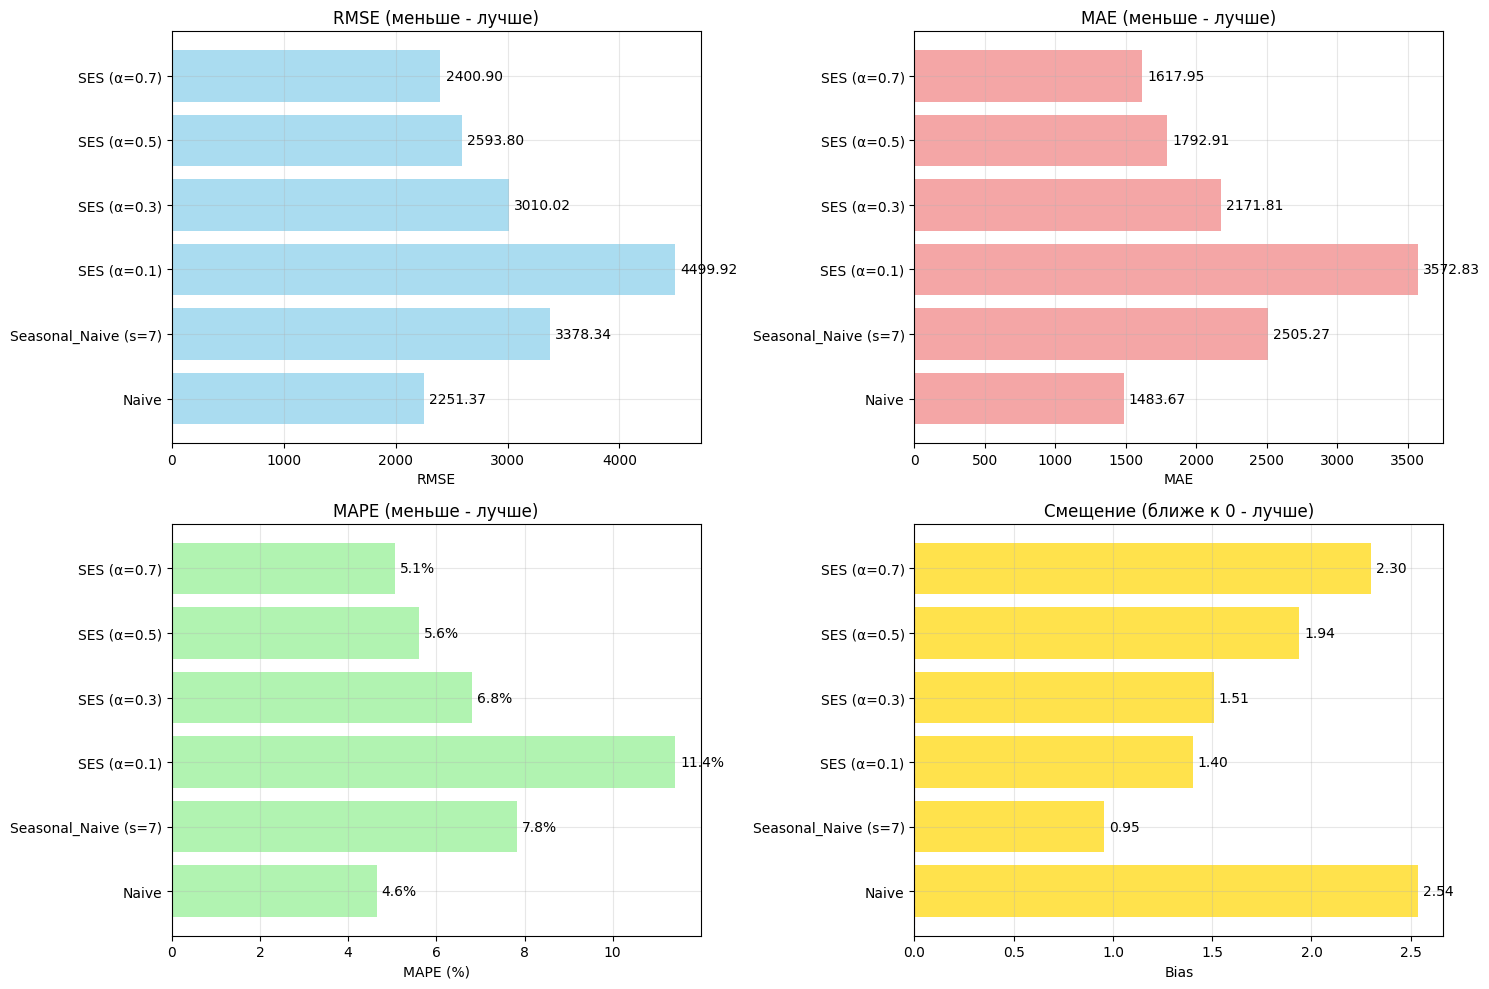


📊 АНАЛИЗ МЕТРИК БАЗОВЫХ МОДЕЛЕЙ

Модель                    RMSE     MAE      MAPE%    Bias     Фолды   
--------------------------------------------------------------------------------
Naive                     2251.37  1483.67  4.6      2.54     7469    
SES (α=0.7)               2400.90  1617.95  5.1      2.30     7469    
SES (α=0.5)               2593.80  1792.91  5.6      1.94     7469    
SES (α=0.3)               3010.02  2171.81  6.8      1.51     7469    
Seasonal_Naive (s=7)      3378.34  2505.27  7.8      0.95     7469    
SES (α=0.1)               4499.92  3572.83  11.4     1.40     7469    

🎯 ЛУЧШИЕ МОДЕЛИ:
• По RMSE: Naive (RMSE = 2251.37)
• По MAPE: Naive (MAPE = 4.6%)
• Самая стабильная: Naive (std RMSE = 1488.30)

💡 РЕКОМЕНДАЦИИ:
• Baseline для сравнения: Naive
• Если данные сезонные: Seasonal_Naive
• Если данные стационарные: SES с оптимальным alpha

💾 Результаты сохранены в 'baseline_models_metrics.csv'

📋 РЕЗУЛЬТАТЫ ДЛЯ ОТЧЕТА:
Naive: RMSE=2251.37, MAE=1483.67, MA

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(true_values, predictions, model_name):
    """Расчет всех метрик для модели"""
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100

    return {
        'model': model_name,
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'bias': np.mean(predictions - true_values)
    }

def fixed_time_series_cv(series, forecast_func, min_train_size=100, step=1, h=7):
    """
    Исправленная версия кросс-валидации
    """
    n = len(series)
    cv_scores = {
        'rmse': [],
        'mae': [],
        'predictions': [],
        'true_values': []
    }

    for i in range(min_train_size, n - h + 1, step):
        train = series[:i]
        test = series[i:i+h]

        try:
            # Правильный вызов функции - только train и h
            preds = forecast_func(train, h)

            if not isinstance(preds, (np.ndarray, list)):
                continue

            preds = np.array(preds)
            actual_test = test[:len(preds)]
            actual_preds = preds[:len(actual_test)]

            if len(actual_test) > 0:
                rmse_fold = np.sqrt(mean_squared_error(actual_test, actual_preds))
                mae_fold = mean_absolute_error(actual_test, actual_preds)

                cv_scores['rmse'].append(rmse_fold)
                cv_scores['mae'].append(mae_fold)
                cv_scores['predictions'].append(actual_preds)
                cv_scores['true_values'].append(actual_test)

        except Exception as e:
            continue

    return cv_scores

def evaluate_baseline_models(series, h=7, season_length=7, min_train_size=100):
    """Оценка базовых моделей с метриками"""

    # Функции моделей с правильной сигнатурой
    def naive_model(train, horizon):
        last_value = train[-1]
        return np.full(horizon, last_value)

    def seasonal_naive_model(train, horizon):
        predictions = []
        for i in range(horizon):
            seasonal_index = -season_length + (i % season_length)
            pred_value = train[seasonal_index]
            predictions.append(pred_value)
        return np.array(predictions)

    def ses_model(train, horizon, alpha=0.3):
        level = train[0]
        for i in range(1, len(train)):
            level = alpha * train[i] + (1 - alpha) * level
        return np.full(horizon, level)

    # Модели без lambda - создаем конкретные функции
    def ses_01(train, horizon):
        return ses_model(train, horizon, 0.1)

    def ses_03(train, horizon):
        return ses_model(train, horizon, 0.3)

    def ses_05(train, horizon):
        return ses_model(train, horizon, 0.5)

    def ses_07(train, horizon):
        return ses_model(train, horizon, 0.7)

    models = {
        'Naive': naive_model,
        f'Seasonal_Naive (s={season_length})': seasonal_naive_model,
        'SES (α=0.1)': ses_01,
        'SES (α=0.3)': ses_03,
        'SES (α=0.5)': ses_05,
        'SES (α=0.7)': ses_07,
    }

    all_metrics = []

    for model_name, model_func in models.items():
        print(f"🔍 Оцениваем {model_name}...")

        cv_results = fixed_time_series_cv(series, model_func,
                                        min_train_size=min_train_size,
                                        h=h, step=7)

        if len(cv_results['rmse']) > 0:
            all_true = np.concatenate(cv_results['true_values'])
            all_preds = np.concatenate(cv_results['predictions'])

            metrics = calculate_metrics(all_true, all_preds, model_name)
            metrics.update({
                'num_folds': len(cv_results['rmse']),
                'rmse_std': np.std(cv_results['rmse']),
                'mae_std': np.std(cv_results['mae'])
            })
            all_metrics.append(metrics)

            print(f"   ✅ RMSE: {metrics['rmse']:.2f} ± {metrics['rmse_std']:.2f}")
            print(f"   ✅ MAE: {metrics['mae']:.2f}, MAPE: {metrics['mape']:.1f}%")
            print(f"   ✅ Фолдов: {metrics['num_folds']}")
        else:
            print(f"   ❌ Нет успешных фолдов")

    return pd.DataFrame(all_metrics)

def plot_metrics_comparison(metrics_df):
    """Визуализация сравнения метрик"""
    if metrics_df.empty:
        print("Нет данных для визуализации")
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # RMSE
    models = metrics_df['model']
    y_pos = np.arange(len(models))

    bars1 = ax1.barh(y_pos, metrics_df['rmse'], alpha=0.7, color='skyblue')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(models)
    ax1.set_xlabel('RMSE')
    ax1.set_title('RMSE (меньше - лучше)')
    ax1.grid(True, alpha=0.3)

    # Добавляем значения на барплот
    for i, (bar, value) in enumerate(zip(bars1, metrics_df['rmse'])):
        ax1.text(bar.get_width() + max(metrics_df['rmse']) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}', ha='left', va='center')

    # MAE
    bars2 = ax2.barh(y_pos, metrics_df['mae'], alpha=0.7, color='lightcoral')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(models)
    ax2.set_xlabel('MAE')
    ax2.set_title('MAE (меньше - лучше)')
    ax2.grid(True, alpha=0.3)

    for i, (bar, value) in enumerate(zip(bars2, metrics_df['mae'])):
        ax2.text(bar.get_width() + max(metrics_df['mae']) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}', ha='left', va='center')

    # MAPE
    bars3 = ax3.barh(y_pos, metrics_df['mape'], alpha=0.7, color='lightgreen')
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels(models)
    ax3.set_xlabel('MAPE (%)')
    ax3.set_title('MAPE (меньше - лучше)')
    ax3.grid(True, alpha=0.3)

    for i, (bar, value) in enumerate(zip(bars3, metrics_df['mape'])):
        ax3.text(bar.get_width() + max(metrics_df['mape']) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.1f}%', ha='left', va='center')

    # Bias
    bars4 = ax4.barh(y_pos, metrics_df['bias'], alpha=0.7, color='gold')
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(models)
    ax4.set_xlabel('Bias')
    ax4.set_title('Смещение (ближе к 0 - лучше)')
    ax4.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    ax4.grid(True, alpha=0.3)

    for i, (bar, value) in enumerate(zip(bars4, metrics_df['bias'])):
        ax4.text(bar.get_width() + max(np.abs(metrics_df['bias'])) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{value:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()

def print_metrics_analysis(metrics_df):
    """Анализ и вывод результатов"""
    print("\n" + "="*80)
    print("📊 АНАЛИЗ МЕТРИК БАЗОВЫХ МОДЕЛЕЙ")
    print("="*80)

    # Сортируем по RMSE
    metrics_df = metrics_df.sort_values('rmse')

    print(f"\n{'Модель':<25} {'RMSE':<8} {'MAE':<8} {'MAPE%':<8} {'Bias':<8} {'Фолды':<8}")
    print("-" * 80)

    for _, row in metrics_df.iterrows():
        print(f"{row['model']:<25} {row['rmse']:<8.2f} {row['mae']:<8.2f} "
              f"{row['mape']:<8.1f} {row['bias']:<8.2f} {row['num_folds']:<8}")

    # Анализ лучших моделей
    best_rmse = metrics_df.iloc[0]
    best_mape = metrics_df.loc[metrics_df['mape'].idxmin()]
    best_stable = metrics_df.loc[metrics_df['rmse_std'].idxmin()]

    print(f"\n🎯 ЛУЧШИЕ МОДЕЛИ:")
    print(f"• По RMSE: {best_rmse['model']} (RMSE = {best_rmse['rmse']:.2f})")
    print(f"• По MAPE: {best_mape['model']} (MAPE = {best_mape['mape']:.1f}%)")
    print(f"• Самая стабильная: {best_stable['model']} (std RMSE = {best_stable['rmse_std']:.2f})")

    print(f"\n💡 РЕКОМЕНДАЦИИ:")
    print(f"• Baseline для сравнения: {best_rmse['model']}")
    print(f"• Если данные сезонные: Seasonal_Naive")
    print(f"• Если данные стационарные: SES с оптимальным alpha")

    return metrics_df


if __name__ == "__main__":
    series_data = new_df[y_col].values if hasattr(new_df, y_col) else series

    print("🎯 ЗАПУСК ОЦЕНКИ БАЗОВЫХ МОДЕЛЕЙ")
    print("="*50)

    metrics_results = evaluate_baseline_models(
        series_data,
        h=7,
        season_length=7,
        min_train_size=100
    )

    if not metrics_results.empty:
        plot_metrics_comparison(metrics_results)
        final_analysis = print_metrics_analysis(metrics_results)

        final_analysis.to_csv('baseline_models_metrics.csv', index=False)
        print(f"\n💾 Результаты сохранены в 'baseline_models_metrics.csv'")

        print(f"\n📋 РЕЗУЛЬТАТЫ ДЛЯ ОТЧЕТА:")
        for _, row in final_analysis.iterrows():
            print(f"{row['model']}: RMSE={row['rmse']:.2f}, MAE={row['mae']:.2f}, MAPE={row['mape']:.1f}%")
    else:
        print("❌ Не удалось получить результаты оценки")